<center><h2><b> FINAL PROJECT </b></h2></center><center><h3><b>MSDS 6371 - 403</b></h3></center><center><h3><b>Data Mining</b></h3></center>


<h4><b>Team Members:</b></h4>
<ul>
  <li>Lisa Mendez</li>
  <li>Brandon Lawrence</li>
  <li>Dominique Edwards</li>
  <li>Mariana Llamas-Cendon</li>
</ul>

<center><h3><b> 1. Business Understanding (10 points total)</b></h3></center>

<h4><b> 1.1 <i>Describe the purpose of the data set you selected (i.e., why was this data collected in the first place?).</i></b></h4> 

The National Highway Traffic Safety Administration’s (NHTSA) Office of Vehicle Safety Research’s mission is to “strategize, plan, and implement research programs to continually further the Agency's goals in reduction of crashes, fatalities, and injuries. Our research is prioritized based on potential for crash/fatality/injury reductions and is aligned with Congressional Mandates, DOT & NHTSA goals.” 
Fatality Analysis Reporting System (FARS) provides NHTSA a nationwide census of data regarding fatal injuries suffered in a motor vehicle traffic crashes. 
FARS contains data that are derived from a census of fatal traffic crashes (within all 50 states, DC, Hawaii, American Samoa, Guam, U.S. Virgin Islands, and Puerto Rico). 
In this context a crash, or accident, must involve a motor vehicle traveling on a trafficway open to the public and resulted in a death of at least one person within 30 days of the crash. The death of an occupant or a non-motorist involved in the crash results in a record included in FARS. 
Even though data has been collected since 1975-- to measure highway safety, identify traffic safety issues, recommend solutions, and assist in an objective basis to evaluate the effectiveness of motor vehicle safety standards and highway safety programs-- the data set used in this project corresponds only to the year 2015.

<h4><b>1.2 <i>How would you measure the effectiveness of a good prediction algorithm? Be specific.</i></b></h4>

In order to measure the effectiveness of a good prediction algorithm methods such as cross validation can be done.  Five fold, stratified, and 10 fold.  Other metrics, such as precision, recall, and truth charts can also be done to determine how well the prediction model generalizes the data.

<center><h3><b>2. Data Understanding (20 points total)</b></h3></center>

<h4><b>2.1 <i> [10 points] Describe the meaning and type of data (scale, values, etc.) for each
attribute in the data file. </i></b></h4>

The data set used in this project named "accident_reduced_GOOD" is a cleaned version of the original data set (that contained 52 attributes), in which those attributes not useful to the analysis were already deleted. The main causes for deletion were:

- Missing or unknown data for those attributes represented more than 50% of the total number of observations
- Attributes were redundant
- Attributes did not provide any insight

<p> The original data set contained <b>missing</b> or <b>unknown</b> values coded as either: <i>9, 99, 9999, 99.9999</i> or <i>999.9999</i> so they were easily identifiable; while  <i>8, 88, 8888, 88.8888, 888.8888, 98, 9998</i> meant values were <b>not reported/not available</b> .
Values that did <b>not provide any useful information</b> such as <i>0 "not applicable"</i> or <i>7, 97, 98 "other"</i> depending on the attribute, were dropped. 
<p>In the case of categorical variables in which there was a level "other" coded either as <i>7, 8, 997</i> that did not provide any additional or useful information, those rows containing it were also dropped. </p>
<p>Attribute <b><i>LGT_COND</i></b>, for instance, contains several levels dedicated to describe the darkness of a particular situation, such as:  <i>2 (Dark – Not Lighted), 3 (Dark – Lighted) and 6 (Dark-- unknown lighting)</i>. In the case of level <i>6 (Dark -- unknown lighting)</i> we considered it provides no additional nor useful information in comparison to levels 2 and 3. Therefore, we dropped the rows containing level 6. </p>
<p>Columns <b><i>DAY, MONTH, YEAR</i></b> were combined (and dropped) into a new one named <b><i>DATETIME</i></b> which was coerced into dtype datetime. Since we could not find a feasible way to combine <b><i>DATETIME</i></b> column with columns <b><i>HOUR and MINUTE</i></b> or to even properly combine <b><i>HOUR and MINUTE</i></b> into one column to create a timestamp, we decided to drop attribute <b><i>MINUTE</i></b> as <b><i>HOUR</i></b> would provide sufficient information that can bu used. 
<p> We did not find any duplicates in the data set. <b><i>ST_CASE</i></b> is the only attribute that should contain only unique values, so we did perform a duplicate checking just to make sure that there were not two repeated cases, and it came out clean. </p>But it was dropped because it only referred to the accident reported case. 
<p> In the case of outliers, once coded missing values were converted to NaNs, we revise continuous, categorical and binary attributes using <i>.describe()</i> to check that the <b>min</b> and <b>max</b> values corresponded to the different levels and values we were expecting. Nevertheless, we will use boxplots to look at the remaining attributes more closely to determine if outliers are present, and if so, determine their importance and make a decision about keeping some of those observations or not. 
<p> The continuous variables in our data set had no missing values, therefore imputation was not required. 

The list of attributes dropped is found in the following table.


<table>

<tr><th colspan="3", style="text-align: center;"> <h1>Attributes deleted from original data set</h1></th></tr>
<tr><th><h2> Attribute name </h2></th> <th><h2> Delete Reason </h2></th></tr>

<tr> <td>COUNTY</td> <td>Use of geographical codes that will not contribute to analysis</td> </tr>
<tr> <td>ST_CASE</td> <td>Unique identifier for each accident reported, not contributing to analysis</td></tr>
<tr> <td>CITY</td>  <td>Too few observations available</td> </tr>
<tr> <td>DAY</td> <td>merged with Month and Year into new column named DATETIME</td></tr> 
<tr> <td>MONTH</td> <td>merged with DAY and Year into new column named DATETIME</td></tr> 
<tr> <td>MINUTE</td> <td>Not able to convert it into appropriate format</td> </tr>
<tr> <td>SP_JUR</td> <td>identifies if the location on the trafficway where the crash occurred qualifies as a Special Jurisdiction or not. Considering that there are about 30,560 instances of class 0 (No Special Jurisdiction), this attribute only adds noise and not much information as information about this can be obtained from attribute ROUTE.</td> </tr>
<tr> <td>RD_OWNER</td> <td>This attribute is pretty much similar to that named ROUTE, only that in here the route is identified with a particular agency, whether Federal, State, or Local</td> </tr>
<tr> <td>RUR_URB</td> <td>this attribute identifies if the road where the accident had ocurred is rural or urban, but that information can be derived from the attribute ROUTE</td> </tr>
<tr> <td>LONGITUD</td> <td>This element identifies the location of the crash using Global Position coordinates, and will not contribute to analysis</td> </tr>
<tr> <td>LATITUDE</td> <td>Same reason as LONGITUD</td> </tr>
<tr> <td>FUNC_SYS</td> <td>This element describe the type of road where an accident happened. Information can be obtained from ROUTE</td> </tr>
<tr> <td>TYP_INT</td> <td>TThis data element identifies and allows separation of various intersection types but can derived from RELJCT2, which identifies the crash's location with respect to presence in or proximity to components typically in junction or interchange areas</td> </tr>
<tr> <td>NHS</td> <td>This data element identifies whether this crash occurred on a trafficway that is part of the National Highway System. We can obtain this information from ROUTE attribute</td> </tr>
<tr> <td>TWAY_ID</td> <td>This data element records the trafficway on which the crash occurred. This information can be derived from ROUTE attribute</td> </tr>
<tr> <td>TWAY_ID2</td> <td>Too few values available</td> </tr>
<tr> <td>MILEPT</td> <td>Too few observations available</td> </tr>
<tr> <td>WEATHER1</td> <td>Too few observations available</td> </tr>
<tr> <td>WEATHER2</td> <td>Too few observations available</td> </tr>
<tr> <td>SCH_BUS</td> <td>Not relevant for analysis</td> </tr>
<tr> <td>RAIL</td> <td>Too few observations</td> </tr>
<tr> <td>NOT_HOUR</td> <td>Too few observations available</td> </tr>
<tr> <td>NOT_MIN</td> <td>Too few observations available</td> </tr>
<tr> <td>ARR_HOUR</td> <td>Too few observations available</td> </tr>
<tr> <td>ARR_MIN</td> <td>Too few observations available</td> </tr>
<tr> <td>HOSP_HR</td> <td>Not relevant for analysis</td> </tr>
<tr> <td>HOSP_MIN</td> <td>Not relevant for analysis</td> </tr>
<tr> <td>CF1</td> <td>Too few observations available</td> </tr>
<tr> <td>CF2</td> <td>Too few observations available</td> </tr>
<tr> <td>CF3</td> <td>Too few observations available</td> </tr>


### Attributes kept

The "accident_reduced_GOOD" data set was cleaned prior to being used for this project, in order to reduce noise that other not-so-important or redundant attributes could add. The deletion was based on the following criteria:

- Some missing values had already been deleted, when the attributes that did not provide any insight or had too few values were dropped, but it is necessary to check for missing values within the data set that will be used for this project.
- Some Instances of some attributes that had less than 10 observations were removed (there are still some attributes that we will analyze based on a cut-off of 10) to decide if those instances are worth keeping). 
- No continuous attributes had any missing values so imputation was not required.

The attributes used for this analysis are found in the following table, along with a brief description of each:


<table>

<tr><th colspan="3", style="text-align: center;"> <h1>Attributes kept</h1></th></tr>
<tr><th><h2> Attribute name </h2></th> <th><h2>Type</h2></th> <th><h2> Description </h2></th></tr>

<tr> <td>STATE</td> <td>Categorical/nominal</td> <td>Originally (1-56). The following states were deleted as the analysis was kept within continental U.S.:<br>
- *American Samoa*<br>
- *D.C*<br>
- *Guam*<br>
- *Puerto Rico*<br>
- *Virgin Islands*</tr>
<tr> <td>VE_TOTAL</td> <td>Continuous</td> <td>number of contact motor vehicles that the officer reported on the PAR as a unit involved in the crash</td> </tr>
<tr> <td>VE_FORMS</td> <td>Continuous</td> <td>count of the number of vehicles in-transport involved in the crash</td> </tr>
<tr> <td>PVH_INVL</td> <td>Continuous</td> <td>count of the number of parked and working vehicles involved in the crash</td> </tr>
<tr> <td>PEDS</td> <td>Continuous</td> <td>number of Person Forms (Not a Motor Vehicle Occupant) that are applicable to this case (i.e., non-occupants) </td> </tr>
<tr> <td>PERNOTMVIT</td> <td>Continuous</td> <td> count of the number of non-motorists in the crash </td> </tr>
<tr> <td>PERMVIT</td> <td>Continuous</td> <td> count of the number of motorists in the crash. A motorist is a driver, 
          passenger or unknown occupant type of a motor  vehicle in-transport </td> </tr>
<tr> <td>PERSONS</td> <td>Continuous</td> <td> count of the number of Person Level (Motor Vehicle Occupant) </td> </tr>
<tr> <td>DAY_WEEK</td> <td>Categorical/ordinal (1-Sunday -- 7-Monday)</td> <td>  records the day of the week on which the crash occurred. <br>*Attribute was one-hot encoded </td> </tr>
<tr> <td>HOUR</td> <td>Continuous (0-23)</td> <td>  records the hour at which the crash occurred </td> </tr>
<tr> <td>ROUTE</td> <td>Categorical/nominal</td> <td>  identifies the route signing of the trafficway on which the crash occurred. Having the following levels:<br>          1 Interstate<br> 
                 2 U.S. Highway <br>
                 3 State Highway <br>
                 4 County Road <br>
                 5 Local Street – Township <br>
                 6 Local Street – Municipality <br>
                 7 Local Street – Frontage Road<br>
                 The attribute was hot-encoded</td> </tr>

<tr> <td>HARM_EV</td> <td>Categorical/nominal with more than 30 levels</td> <td>  describes the first injury or damage producing event of the crash.<br> The attribute was one-hot encoded </td> </tr>
<tr> <td>RELJCT1</td> <td>Categorical/binary</td> <td>   This data element identifies the crash's location with respect to presence in an interchange area </td> </tr>
<tr> <td>RELJCT2</td> <td>Categorical/nominal</td> <td>  identifies the crash's location with respect to presence in an interchange area. <br>
                 The coding of this data element is done in two sub-fields (see also C20B) and is 
                 based on the location of the “First Harmful Event” of the crash<br>
Levels:    <br>      1 Non-Junction <br>
                 2 Intersection<br>
                 3 Intersection Related <br>
                 4 Driveway Access<br>
                 5 Entrance/Exit Ramp Related<br>
                 6 Railway Grade Crossing<br>
                 7 Crossover Related<br>
                 8 Driveway Access Related<br> 
                 16 Shared-Use Path Crossing<br>
                 17 Acceleration/Deceleration Lane<br>
                 18 Through Roadway<br>
                 19 Other Location Within Interchange Area<br>
                 20 Entrance/Exit Ramp<br> *Attribute was one-hot encoded </td> </tr>

<tr> <td>WRK_ZONE</td> <td>Categorical/nominal </td> <td>  identifies a motor vehicle traffic crash in which the first harmful event occurs 
                 within the boundaries of a work zone or on an approach to or exit from a work zone, 
                 resulting from an activity, behavior, or control related to the movement of the 
                 traffic units through the work zone. <br>
Levels:   <br>       0 None <br>
                 1 Construction <br>
                 2 Maintenance <br>
                 3 Utility <br> *Attribute was one-hor encoded</td> </tr>
<tr> <td>MAN_COLL</td> <td>Categorical/nominal</td> <td>  describes the orientation of two motor vehicles in-transport when they are 
                 involved in the “First Harmful Event” of a collision crash. If the “First 
                 Harmful Event” is not a collision between two motor vehicles in-transport it 
                 is classified as such." <br>
Levels:   <br>       0 Not Collision with Motor Vehicle in Transport <br>
                 1 Front-to-Rear<br>
                 2 Front-to-Front<br>
                 6 Angle<br>
                 7 Sideswipe – Same Direction<br>
                 8 Sideswipe – Opposite Direction<br>
                 9 Rear-to-Side<br>
                 10 Rear-to-Rear<br>
                 11 Other (End-Swipes and Others)<br> *Attribute was one-hor encoded</td> </tr>

<tr> <td>REL_ROAD</td> <td>Categorical/nominal</td> <td>  identifies the location of the crash as it relates to its position within or 
                 outside the trafficway based on the “First Harmful Event”. <br>
Levels: <br>         1 On Roadway<br>
                 2 On Shoulder<br>
                 3 On Median<br>
                 4 On Roadside<br>
                 5 Outside Trafficway<br>
                 6 Off Roadway – Location Unknown <br>
                 7 In Parking Lane/Zone <br>
                 8 Gore<br>
                 10 Separator <br>
                 11 Continuous Left-Turn Lane<br> *Attribute was one-hot encoded </td> </tr>
<tr> <td>LGT_COND</td> <td>Categorical/nominal</td> <td>  records the type/level of light that existed at the time of the crash as indicated 
                 in the case material.<br>
Levels:   <br>       1 Daylight<br>
                 2 Dark – Not Lighted <br>
                 3 Dark – Lighted <br>
                 4 Dawn <br>
                 5 Dusk <br>
                 *Attribute was one-hot encoded</td> </tr>
<tr> <td>WEATHER</td> <td>Categorical/nominal</td> <td>  records the prevailing atmospheric conditions that existed at the time of the crash 
                 as indicated in the case material. <br>
Levels:  <br>           1 Clear <br>
                 0 No Additional Atmospheric Conditions<br>
                 2 Rain<br>
                 3 Sleet, Hail<br>
                 4 Snow<br>
                 5 Fog, Smog, Smoke<br>
                 6 Severe Crosswinds<br>
                 7 Blowing Sand, Soil, Dirt<br>
                 8 Other<br>
                 10 Cloudy<br>
                 11 Blowing Snow<br>
                 12 Freezing Rain<br>*Attribute was one-hot encoded  </td> </tr>
<tr> <td>FATALS</td> <td>Continuous </td> <td>   records the number of fatally injured persons in the crash. 01-99 Number of 
                 Fatalities that Occurred in the crash </td> </tr>

<tr> <td>DRUNK_DR</td> <td>Continuous </td> <td>   records the number of drunk drivers involved in the crash. 00-99 Number of Drunk 
                 Drivers Involved in the Fatal Crash </td> </tr>




In [1]:
import warnings
warnings.filterwarnings("ignore")

from datetime import datetime

import pandas as pd
from pandas import DataFrame
import numpy as np
#import matplotlib as plt
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
df_reduced = pd.read_excel('accident_reduced_GOOD.xlsx')
df_reduced.head()

,STATE,VE_TOTAL,VE_FORMS,PVH_INVL,PEDS,PERNOTMVIT,PERMVIT,PERSONS,DAY_WEEK,HOUR,...,HARM_EV,MAN_COLL,RELJCT1,RELJCT2,WRK_ZONE,REL_ROAD,LGT_COND,WEATHER,FATALS,DRUNK_DR
0,1,1,1,0,0,0,1,1,5,2.0,...,35.0,0.0,0.0,1.0,0,4.0,2.0,1.0,1,1
1,1,1,1,0,0,0,1,1,5,22.0,...,34.0,0.0,0.0,1.0,0,3.0,2.0,10.0,1,0
2,1,1,1,0,0,0,2,2,5,1.0,...,42.0,0.0,0.0,1.0,0,4.0,2.0,1.0,1,1
3,1,1,1,0,0,0,1,1,1,0.0,...,53.0,0.0,0.0,1.0,0,4.0,2.0,10.0,1,1
4,1,2,2,0,0,0,2,2,4,7.0,...,12.0,6.0,0.0,2.0,0,1.0,1.0,1.0,1,0


In [3]:
print ('The number of rows is       ', df_reduced.shape[0])
print ('The number of attributes is ', df_reduced.shape[1])

The number of rows is        30782
The number of attributes is  21


In [4]:
df_reduced.describe()

,STATE,VE_TOTAL,VE_FORMS,PVH_INVL,PEDS,PERNOTMVIT,PERMVIT,PERSONS,DAY_WEEK,HOUR,...,HARM_EV,MAN_COLL,RELJCT1,RELJCT2,WRK_ZONE,REL_ROAD,LGT_COND,WEATHER,FATALS,DRUNK_DR
count,30782.000000,30782.000000,30782.000000,30782.000000,30782.000000,30782.000000,30782.000000,30782.000000,30782.000000,30559.000000,...,30765.000000,30713.000000,30770.000000,30743.000000,30782.000000,30742.000000,30633.000000,30528.000000,30782.000000,30782.000000
mean,27.257326,1.560295,1.525275,0.035020,0.213599,0.222533,2.290982,2.299916,4.101683,12.809974,...,18.096408,1.590597,0.042931,1.992811,0.034338,2.197645,1.821793,2.741713,1.091515,0.282048
std,16.164732,0.896582,0.860231,0.264058,0.481171,0.508517,1.957383,1.962260,2.090771,6.868892,...,13.917434,2.507310,0.202706,2.811779,0.295109,1.583078,0.973972,3.397274,0.367148,0.466383
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,12.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,7.000000,...,9.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
50%,27.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,4.000000,14.000000,...,12.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,1.000000,1.000000,0.000000
75%,42.000000,2.000000,2.000000,0.000000,0.000000,0.000000,3.000000,3.000000,6.000000,19.000000,...,30.000000,2.000000,0.000000,2.000000,0.000000,4.000000,2.000000,2.000000,1.000000,1.000000
max,56.000000,58.000000,58.000000,11.000000,16.000000,16.000000,93.000000,93.000000,7.000000,23.000000,...,59.000000,11.000000,1.000000,20.000000,4.000000,11.000000,5.000000,12.000000,10.000000,3.000000


### Data cleaning

#### Dealing with missing values
As it was mentioned earlier, those missing values that were easily identifiable were already deleted. It is imperative to check now for missing values within the current data set. 

Based on our experience wth this data set, we expect missing values to be located within categorical attributes but not continuous ones.

In [5]:
df_reduced.isnull().any()

STATE         False
VE_TOTAL      False
VE_FORMS      False
PVH_INVL      False
PEDS          False
PERNOTMVIT    False
PERMVIT       False
PERSONS       False
DAY_WEEK      False
HOUR           True
ROUTE          True
HARM_EV        True
MAN_COLL       True
RELJCT1        True
RELJCT2        True
WRK_ZONE      False
REL_ROAD       True
LGT_COND       True
WEATHER        True
FATALS        False
DRUNK_DR      False
dtype: bool

None of the continuous variables have missing values:

<li> **VE_TOTAL**</li>
<li> ** VE_FORMS**</li>
<li> ** PVH_INVL**</li>
<li> **PEDS**</li>
<li> **PERNOTMVIT**</li>
<li> **PERMVIT**</li>
<li> **PERSONS**</li>
<li> **FATALS**</li>
<li> **DR_DRIVER**</li>


We tried eliminating missing values from categorical attributes by imputing the mode, but missing values prevailed and since <a href="https://pandas.pydata.org/pandas-docs/stable/missing_data.html">Pandas</a> treats missing values as zero, so deleting missing values from dataframe is the best option since some of our categorical variables are binary. 

So in the following two cells, we will get rid of missing values from the whole data set, and then check that the missing values are in fact out. 

In [6]:
# Drop missing values from data set
df_reduced.dropna(inplace = True)

In [7]:
# Check that missing values are in fact gone
df_reduced.isnull().any()

STATE         False
VE_TOTAL      False
VE_FORMS      False
PVH_INVL      False
PEDS          False
PERNOTMVIT    False
PERMVIT       False
PERSONS       False
DAY_WEEK      False
HOUR          False
ROUTE         False
HARM_EV       False
MAN_COLL      False
RELJCT1       False
RELJCT2       False
WRK_ZONE      False
REL_ROAD      False
LGT_COND      False
WEATHER       False
FATALS        False
DRUNK_DR      False
dtype: bool

#### Coercing values from float to integer 
The categorical attributes from the original data set were recorded as integers not floats, although we can see in the table above that many of the categoricals were read as floats for an unknown reason. For the sake of consistency, we will coerce floats to integers. This was not performed previously because presence of missing values prevented us from doing so.

In [8]:
df_reduced['HOUR'] = df_reduced.HOUR.astype(int)
df_reduced['ROUTE'] = df_reduced.ROUTE.astype(int)
df_reduced['HARM_EV'] = df_reduced.HARM_EV.astype(int)
df_reduced['MAN_COLL'] = df_reduced.MAN_COLL.astype(int)
df_reduced['RELJCT1'] = df_reduced.RELJCT1.astype(int)
df_reduced['RELJCT2'] = df_reduced.RELJCT2.astype(int)
df_reduced['REL_ROAD'] = df_reduced.REL_ROAD.astype(int)
df_reduced['LGT_COND'] = df_reduced.LGT_COND.astype(int)
df_reduced['WEATHER'] = df_reduced.WEATHER.astype(int)

#### Deleting instances with  less than 10 values

A cutoff of 10 was determined for all of the attributes, considering that for this project the intention is not to look for individual cases, but at cases that have at least a good number of observations to be considered important. The cutoff of 10 seemed appropriate because it also includes lower values that could be interesting to look at without narrowing down too much to only higher incidences. 

First, it is imperative to check the frequencies of each of the attributes that we believe could contain values less than 10. 

In [9]:
df_reduced.VE_TOTAL.value_counts()

1     16036
2     10620
3      1685
4       382
5       112
6        58
7        25
8        13
9         9
12        2
11        2
19        2
31        1
22        1
14        1
10        1
58        1
29        1
16        1
Name: VE_TOTAL, dtype: int64

In [10]:
df_reduced = df_reduced[df_reduced.VE_TOTAL != 11]
df_reduced = df_reduced[df_reduced.VE_TOTAL != 12]
df_reduced = df_reduced[df_reduced.VE_TOTAL != 9]

In [11]:
df_reduced.VE_FORMS.value_counts()

1     16585
2     10340
3      1509
4       325
5        98
6        44
7        21
8         9
18        2
31        1
14        1
29        1
58        1
10        1
19        1
16        1
Name: VE_FORMS, dtype: int64

In [12]:
df_reduced.PERNOTMVIT.value_counts()

0     23246
1      5286
2       295
3        61
4        27
5         9
6         7
7         5
9         2
11        1
16        1
Name: PERNOTMVIT, dtype: int64

In [13]:
df_reduced = df_reduced[df_reduced.PERNOTMVIT != 16]
df_reduced = df_reduced[df_reduced.PERNOTMVIT != 11]
df_reduced = df_reduced[df_reduced.PERNOTMVIT != 13]
df_reduced = df_reduced[df_reduced.PERNOTMVIT != 9]
df_reduced = df_reduced[df_reduced.PERNOTMVIT != 7]
df_reduced = df_reduced[df_reduced.PERNOTMVIT != 6]
df_reduced = df_reduced[df_reduced.PERNOTMVIT != 5]

In [14]:
df_reduced.PERMVIT.value_counts()

1     11812
2      7958
3      4272
4      2167
5      1189
6       660
7       346
8       206
9        86
10       59
11       42
12       28
0        27
13       15
14        8
18        6
15        6
16        4
24        4
17        2
27        2
22        1
28        1
32        1
48        1
93        1
49        1
29        1
50        1
23        1
19        1
35        1
25        1
20        1
68        1
37        1
53        1
Name: PERMVIT, dtype: int64

In [15]:
df_reduced = df_reduced[df_reduced.PERMVIT != 53]
df_reduced = df_reduced[df_reduced.PERMVIT != 37]
df_reduced = df_reduced[df_reduced.PERMVIT != 68]
df_reduced = df_reduced[df_reduced.PERMVIT != 20]
df_reduced = df_reduced[df_reduced.PERMVIT != 25]
df_reduced = df_reduced[df_reduced.PERMVIT != 35]
df_reduced = df_reduced[df_reduced.PERMVIT != 23]
df_reduced = df_reduced[df_reduced.PERMVIT != 28]
df_reduced = df_reduced[df_reduced.PERMVIT != 50]
df_reduced = df_reduced[df_reduced.PERMVIT != 49]
df_reduced = df_reduced[df_reduced.PERMVIT != 93]
df_reduced = df_reduced[df_reduced.PERMVIT != 48]
df_reduced = df_reduced[df_reduced.PERMVIT != 32]
df_reduced = df_reduced[df_reduced.PERMVIT != 29]
df_reduced = df_reduced[df_reduced.PERMVIT != 22]
df_reduced = df_reduced[df_reduced.PERMVIT != 19]
df_reduced = df_reduced[df_reduced.PERMVIT !=17]
df_reduced = df_reduced[df_reduced.PERMVIT != 24]
df_reduced = df_reduced[df_reduced.PERMVIT != 16]
df_reduced = df_reduced[df_reduced.PERMVIT != 15]
df_reduced = df_reduced[df_reduced.PERMVIT != 18]
df_reduced = df_reduced[df_reduced.PERMVIT != 14]

In [16]:
df_reduced.PEDS.value_counts()

0    23325
1     5224
2      264
3       39
4       17
Name: PEDS, dtype: int64

In [17]:
df_reduced.PERSONS.value_counts()

1     11717
2      7989
3      4306
4      2179
5      1200
6       665
7       347
8       207
9        84
10       59
11       44
12       28
0        27
13       14
27        2
14        1
Name: PERSONS, dtype: int64

In [18]:
df_reduced = df_reduced[df_reduced.PERSONS != 27]
df_reduced = df_reduced[df_reduced.PERSONS != 14]

In [19]:
df_reduced.PVH_INVL.value_counts()

0    28150
1      556
2      112
3       30
4       11
5        4
7        3
Name: PVH_INVL, dtype: int64

In [20]:
df_reduced = df_reduced[df_reduced.PVH_INVL != 7]
df_reduced = df_reduced[df_reduced.PVH_INVL != 5]

In [21]:
df_reduced.DAY_WEEK.value_counts()

7    4957
1    4654
6    4361
5    3975
4    3725
2    3616
3    3571
Name: DAY_WEEK, dtype: int64

In [22]:
df_reduced.HOUR.value_counts()

18    1676
17    1661
20    1636
21    1626
19    1583
15    1523
16    1490
14    1365
22    1359
13    1267
23    1178
0     1119
12    1101
1     1069
2     1066
6     1055
11    1031
7     1023
10     942
5      890
9      859
3      834
8      833
4      673
Name: HOUR, dtype: int64

In [23]:
df_reduced.ROUTE.value_counts()

3    9168
6    5250
2    5044
4    4494
1    3650
5    1041
7     212
Name: ROUTE, dtype: int64

In [24]:
df_reduced.HARM_EV.value_counts()

12    11174
8      4374
1      2498
42     2062
33      961
34      893
35      842
24      687
9       677
30      606
32      381
59      364
38      348
14      310
31      264
53      248
25      239
43      228
5       184
11      169
52      158
18      129
15      123
21       86
23       85
10       79
58       73
39       68
17       61
57       59
19       59
26       47
41       39
46       35
20       33
3        33
7        30
16       29
54       24
48       23
44       22
40       20
49       13
45       12
51       10
Name: HARM_EV, dtype: int64

In [25]:
df_reduced.MAN_COLL.value_counts()

0     17658
6      5262
2      3036
1      2015
7       468
8       308
11       73
9        38
10        1
Name: MAN_COLL, dtype: int64

In [26]:
# Level 10 refers to Rear-to-Rear type of collision
df_reduced = df_reduced[df_reduced.MAN_COLL != 10]

In [27]:
df_reduced.RELJCT1.value_counts()

0    27618
1     1240
Name: RELJCT1, dtype: int64

In [28]:
df_reduced.RELJCT2.value_counts()

1     19782
2      4735
3      2211
8       839
5       433
18      301
19      213
20      112
4        99
6        90
7        43
Name: RELJCT2, dtype: int64

In [29]:
df_reduced.WRK_ZONE.value_counts()

0    28287
1      404
4      110
2       57
Name: WRK_ZONE, dtype: int64

In [30]:
df_reduced.REL_ROAD.value_counts()

1     17375
4      9048
3      1142
5       507
2       424
8       158
10       84
6        56
7        49
11       15
Name: REL_ROAD, dtype: int64

In [31]:
df_reduced.LGT_COND.value_counts()

1    14009
2     8239
3     5283
5      730
4      597
Name: LGT_COND, dtype: int64

In [32]:
df_reduced.WEATHER.value_counts()

1     20799
10     4954
2      2269
5       368
4       302
3        95
12       23
6        21
11       20
7         7
Name: WEATHER, dtype: int64

In [33]:
df_reduced = df_reduced[df_reduced.WEATHER != 7]
df_reduced = df_reduced[df_reduced.WEATHER != 8]

In [34]:
df_reduced.DRUNK_DR.value_counts()

0    20929
1     7707
2      213
3        2
Name: DRUNK_DR, dtype: int64

In [35]:
df_reduced = df_reduced[df_reduced.DRUNK_DR != 3]

In [36]:
df_reduced.FATALS.value_counts()

1    26726
2     1753
3      275
4       70
5       20
6        5
Name: FATALS, dtype: int64

In [37]:
df_reduced = df_reduced[df_reduced.FATALS != 6]

#### Delete levels from attribute STATE

The **STATE** attribute, which is a categorical, contained 56 levels (from 1 to 56)-- each one representing a state plus territories. Our analysis will only consider those states from continental U.S., including Hawaii and Alaska, then the following incidences will be removed: 
- *American Samoa*
- *D.C*
- *Guam*
- *Puerto Rico*
- *Virgin Islands*
 

In [38]:
# Delete those states that are not part of continental USA.
df_reduced = df_reduced[df_reduced.STATE != 3] # Delete rows that pertain to American Samoa
df_reduced = df_reduced[df_reduced.STATE != 11] # Delete rows that pertian to D.C.
df_reduced = df_reduced[df_reduced.STATE != 14] # Delete rows that contain Guam
df_reduced = df_reduced[df_reduced.STATE != 43] # Delete rows that pertain to Puerto Rico
df_reduced = df_reduced[df_reduced.STATE != 52] # Delete rows that pertain to Virgin Islands

After deleting those states that won't be useful in this project, we check the frequencies of the remaining states to make sure that none has less than 10 observations.

In [39]:
df_reduced.STATE.value_counts()

6     2818
48    2386
12    1498
13    1308
37    1259
42    1066
36    1034
39    1002
17     879
26     874
45     861
47     832
1      765
29     762
18     744
51     688
21     674
22     641
4      631
28     596
40     572
55     506
8      504
53     485
34     453
5      447
24     436
41     359
27     348
20     309
32     286
19     276
9      245
54     241
35     235
49     235
30     192
31     185
16     151
25     147
23     139
56     122
46     114
33     101
38     100
10      91
15      81
2       55
50      49
44      41
Name: STATE, dtype: int64

All of the states that were kept have more than 10 observations, so there is no need to perform any other actions on this variable. 

In [40]:
print ('The number of rows is       ', df_reduced.shape[0])
print ('The number of attributes is ', df_reduced.shape[1])

The number of rows is        28823
The number of attributes is  21


After removing all rows that had less than 10 incidences from every attribute, and deleting the territories that do not pertain to continental USA, only 1,959 observations were removed, about 6% of the data. 

#### Properly Indexing dataframe

For an unknown reason, the index of the whole data set was set to start at 0 as opposed to 1, so it was necessary for our own understanding to switch it back to starting at 1. 

In [41]:
#change index to start at 1 not 0
df_reduced.index = np.arange(1, len(df_reduced)+1)

#### Visualizing the first version of the "cleaned" data set

In [42]:
df_reduced.describe()

,STATE,VE_TOTAL,VE_FORMS,PVH_INVL,PEDS,PERNOTMVIT,PERMVIT,PERSONS,DAY_WEEK,HOUR,...,HARM_EV,MAN_COLL,RELJCT1,RELJCT2,WRK_ZONE,REL_ROAD,LGT_COND,WEATHER,FATALS,DRUNK_DR
count,28823.000000,28823.000000,28823.000000,28823.000000,28823.000000,28823.000000,28823.000000,28823.000000,28823.000000,28823.000000,...,28823.000000,28823.000000,28823.000000,28823.000000,28823.000000,28823.000000,28823.000000,28823.000000,28823.000000,28823.000000
mean,27.862436,1.551435,1.519759,0.031676,0.205149,0.212816,2.269160,2.276828,4.097006,12.795962,...,18.116088,1.611977,0.043021,2.000312,0.033029,2.195122,1.815182,2.733893,1.089963,0.281997
std,16.182681,0.740342,0.715242,0.221970,0.442517,0.458635,1.619565,1.621389,2.086971,6.867671,...,13.903453,2.517900,0.202908,2.848601,0.284969,1.585693,0.972106,3.389701,0.351929,0.466114
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,13.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,7.000000,...,9.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
50%,28.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,4.000000,14.000000,...,12.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,1.000000,1.000000,0.000000
75%,42.000000,2.000000,2.000000,0.000000,0.000000,0.000000,3.000000,3.000000,6.000000,19.000000,...,30.000000,2.000000,0.000000,2.000000,0.000000,4.000000,2.000000,2.000000,1.000000,1.000000
max,56.000000,8.000000,8.000000,4.000000,4.000000,4.000000,13.000000,13.000000,7.000000,23.000000,...,59.000000,11.000000,1.000000,20.000000,4.000000,11.000000,5.000000,12.000000,5.000000,2.000000


By using describe, it becomes evident that there are no observation with less than 10 incidences, and no missing values. 

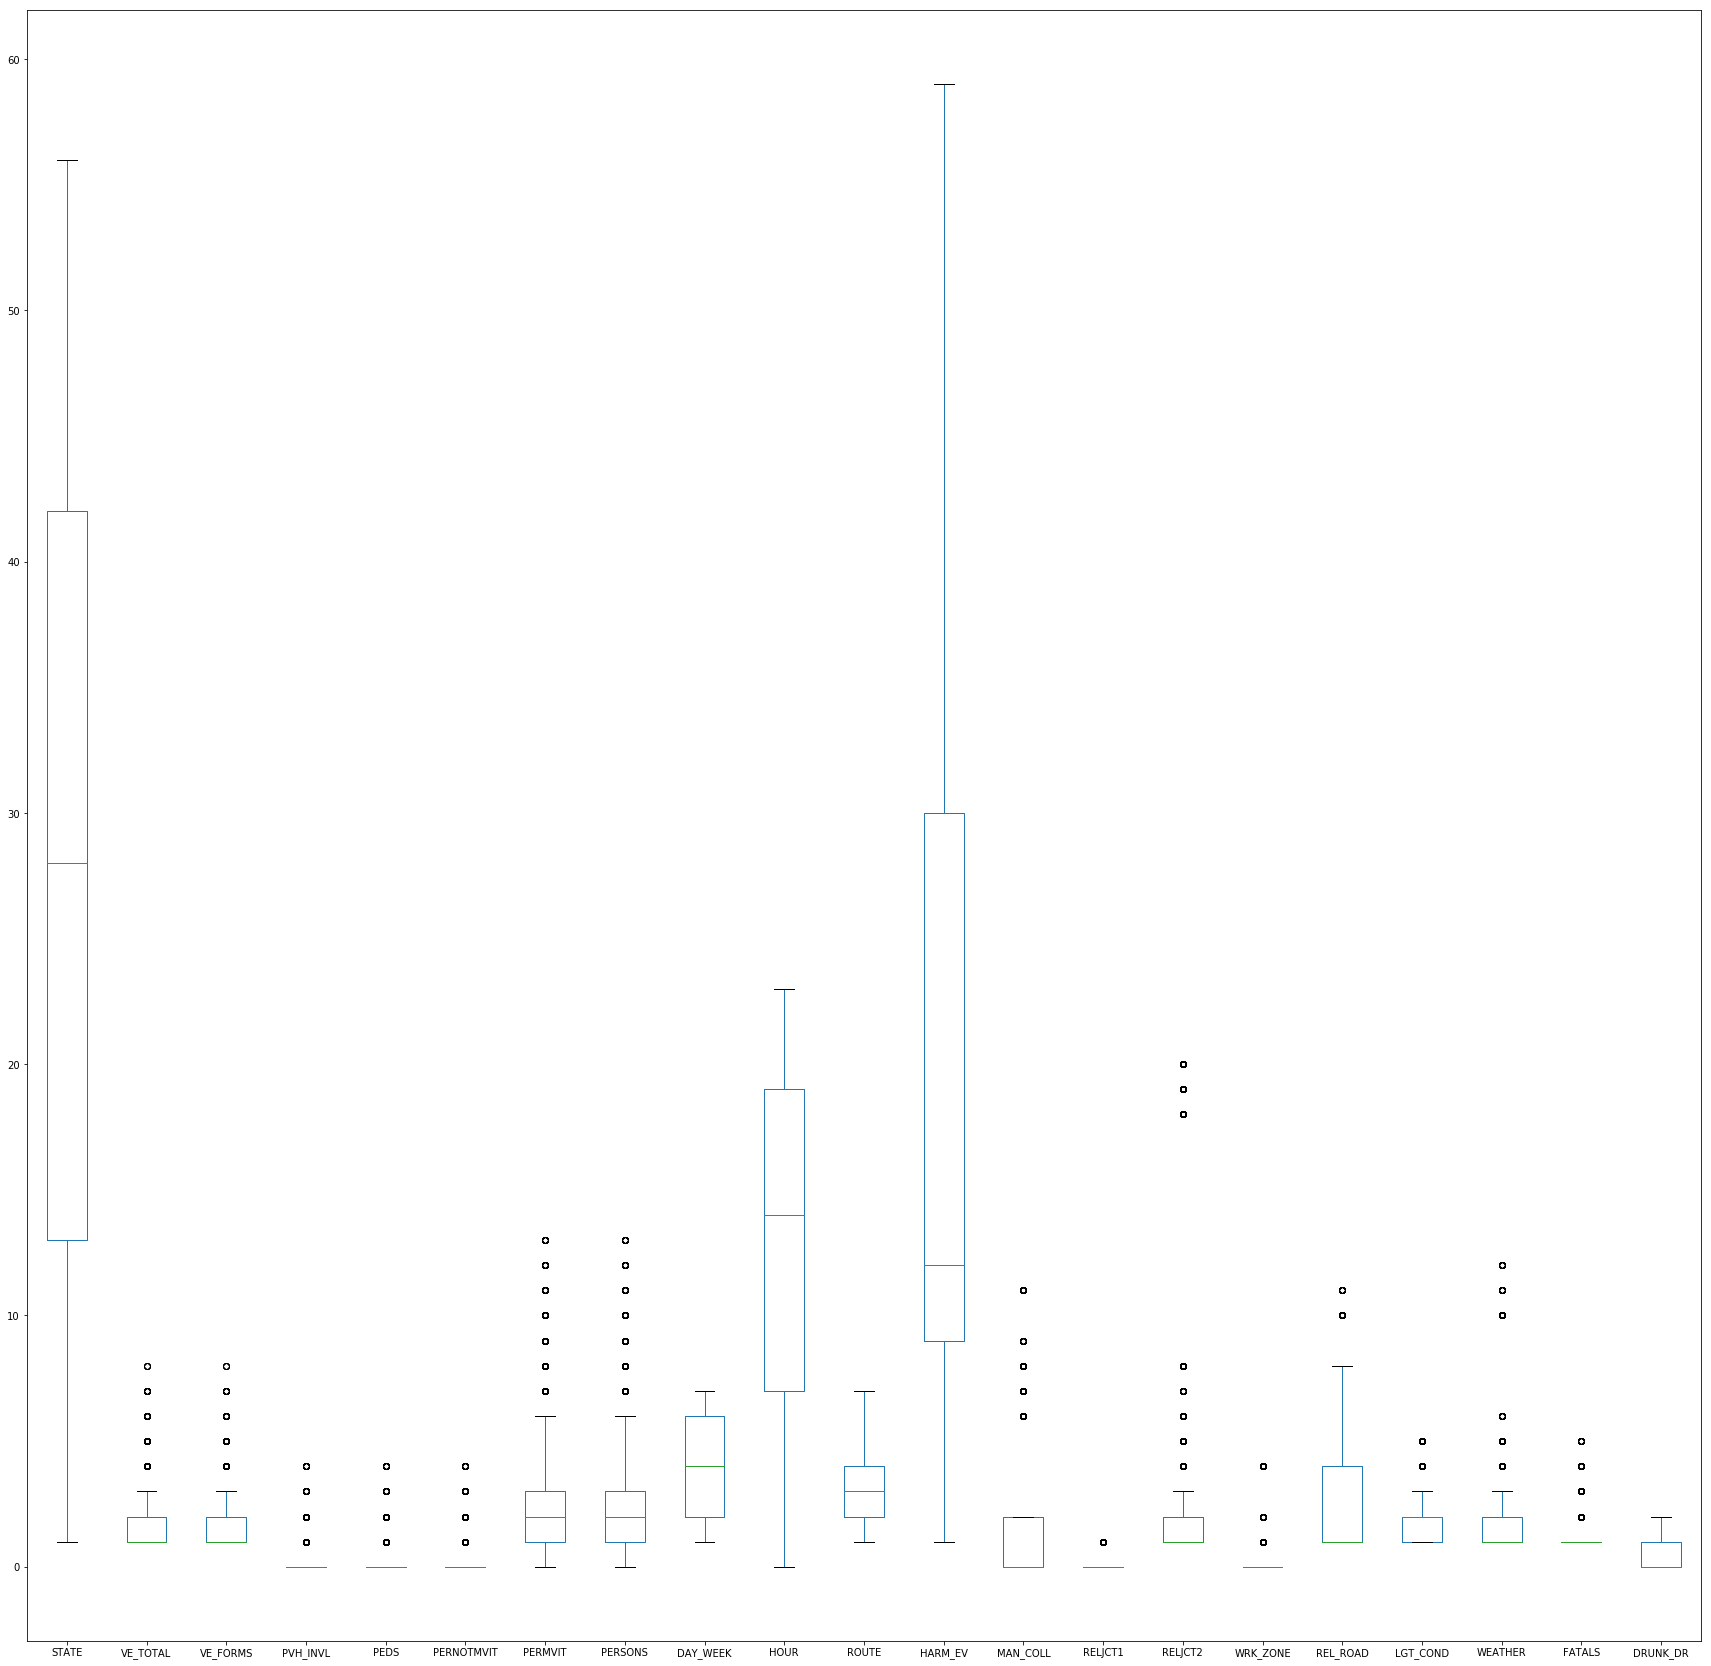

In [43]:
df_reduced.plot(kind='box', figsize = (30, 30))

#### Outliers 

Considering that for these data a cutoff of 10 was established, any outlier that is displayed in the boxplot figure above is not really an outlier because even the most unusual scenarios, for instance a crash involving more than 6 cars, will have some significant representation within a one year period thus becoming not as uncommon. 

In this section we will review only those attributes that based on their boxplot seem odd or interesting. 

Based in the boxplots for each of the attributes in the above figure, VE_TOTAL (number of vehicles involved in a crash, whether in-transit or not)-- as it was expected after deleting all instances with less than 10 observations-- displays some observations outside the boxplot with a maximum value of 8. A crash involving 8 cars could be seen as an extremely unusual situation, but when our data contains 13 accidents that involved 8 cars in just one year, this cannot be considered an outlier. 

VE_FORMS (number of vehicles in-transport involved in crash),on the other hand, displays the exact same values as VE_TOTAL. Their means differ by 0.03 and their standard deviations differ by 0.02, making us believe that these two variables are measuring exactly the same. Therefore, VE_FORMS will be deleted next. 

PVH_INVL (number of parked vehicles involved in crash) displays a maximum of 4 vehicles involved in an single accident. Then again, considering the cutoff of 10,  we can be sure that even though the 25%, median, and 75% quantiles equal 0, having 11 accidents involving 4 parked vehicles is not as unusual. 

The high values shown in PEDS (number of people not occupants of a vehicle involved in the accident)-- considering that the min, 25%, median and 75% equal to 0-- are not outliers either, considering that there are 17 events in our data that involved at once the maximum value of 4 people. It could be argued that PEDS and PERNOTMVIT are astoundingly similar, even pertaining their means and standard deviations which differ approximately by 0.02. They are not equal. Consider that both have a maximum value of 4 people involved at once in an accident, but the number of observations clearly differ: PEDS have 11 accidents involving 4 people, while PERNOTMVIT has 27 accidents involving the same amount of people. 

Similar is the case involving attributes PERMVIT (number of motorists in the crash) and PERSONS (number of occupants in vehicles directly involved in the crash) as judging only their boxplots they look exactly the same, and even their values for min, 25%, 50%, 75%, and max are equal. Judging also from the non-significant difference between their means and standard deviations, we could argue that both attributes are identical. Even both are left skewed, denoting that they are not normally distributed. Nevetheless, they are not equal if we look at their frequencies, in which PERMVIT's maximum value of 13 has a frequency of 15, while PERSONS's has a frequency of 14.  table above the figure display the same exact values. Another difference comes with their median values, in which even though slight they are different: PERMVIT has 11,812 occurrences of the value 1, while PERSONS has 11,717. 

MAN_COLL is another categorical attribute with 11 levels. Being level 0 the median. Interesting is that largest non-outlier is equal to the 75% (level 2). One reason for this behavior could be that the frequencies after level 2 (3036), dramatically descend to 468 up to 38. A similar case is that of RELJCT2 which frequencies dramatically decrease as the levels increase. There is nothing strange for its boxplot not having lower whiskers considering that the median coresponds to level 1 which has the highest frequency of 19,782. 

DRUNK_DR as expected the median is 0, but interestingly enough there were 213 cases in which two drivers involved in an accident were drunk. 

FATALS also indicates that 1 fatality in an accident is the most scenario with 26,726 cases. Nevertheless, the case in which an accident resulted in 5 fatalities had 20 incidences in the year 2015. 


Some attributes that show nothing really interesting are: 

- STATE has no outliers, and it seems to be normally distributed.

- DAY_WEEK is a categorical variable with only 7 levels denoting each day of the week starting from Sunday, so as it was expected it has no outliers. Surprising though is the fact that it is normally distributed. 

- The case of HOUR is similar to that of DAY_WEEK in the sense that their values are well-defined from 0-23. HOUR though is slightly right skewed, with a median value of 14 hours. 

- ROUTE is a categorical attribute with 7 different levels starting at 1. Also it is not normally distributed as it is slightly skewed to the left. The most common level is 3 with more than 9 thousand instances. 

- HARM_EV is another categorical attribute with 59 levels from which level 12 is the median, while the mean is approximately 18. This attribute is clearly positively skewed. 

- RELJCT1 is an unbalanced binary attribute, where class 0 represents about 90% of the data.  

In [44]:
# Delete VE_FORMS as it seems to be redundant with VE_TOTAL
df_reduced.drop('VE_FORMS', axis= 1, inplace =True)

### Data preparation for analysis

Now that missing values, non-significant attributes and non-significant instances (cutoff of 10) had been removed from the data set, the next step is to prepare data for analysis. 

First and foremost, df_reduced will contain the discretized versions of some of the attributes that contain more than 10 levels, such as: 

- For attribute HARM_EV that contains 59 levels, some of which belong to the same category, we will combine levels that similar such as: Embarkement--Earth, Embarkement--Rock, Stone or Concrete, Embarkement--Material Unknown into one single level "Embarkement". This way it will reduce the attribute dimensionality aloowing for a more manageable one that will be easier to interpret. 

- Attribute HOUR has 23 levels, therefore we will discretize it and store its new values in a new column named HR_RANGE as follows: 

<li> **1** = 0-3 a.m. (when supposedly most of the crashes involving fatalities occur)</li>
<li> **2** = 4-7 a.m. (morning hours before hitting the road for most people)</li>
<li> **3** = 8-11 a.m. (rush hour to get to work)</li>
<li> **4** = 12-15 p.m. (lunch hour)</li>
<li> **5** = 16 - 19 p.m. (peak hour after work) </li>
<li> **6** = 20-23 (night time)</li>

Tried using pd.cut but could not get it to work the bins as we wanted, so we tried the harder way by creating a new column **HR_RANGE** derived from **HOUR**, which we will drop next. 


Derived from df_reduced, we will create four different subsets: 

- The first one that will be called "df_accident", and will contain the attribute STATE--which we haven't used for other projects-- and all the other attributes, some of which we had discretized to reduced their dimensions because they contained more than 10 levels;  

- The second one called df_acc_dumm, will store the dummies of the categorical variables, including STATE. 

- The third one will be called "df_reg" where we will create a new attribute derived from STATE REGION, which will have only four levels: West (1), Midwest (2), South (3) and Northeast (4). 

- The fourth one called df_r_dumm will store the one-hot encoded categorical attributes.  store the one-hot encoded attributes derived from "df_accident" considering that most clustering techniques do not work well with categorical variables (half of our attibutes). 


We would like to test if whether one-hot encoding or not categorical attributes will play an important role in the predictive power of the final model. 

#### Creation of df_accident data frame

For df_accident, we will reduce dimensionality of two attributes that we believe are important to determine the number of fatalities or to understand how and under what circumstances a fatality is more likely to happen. 

- HARM_EV, which describes the first injury or damage producing the crash. This attribute is made up of 20 levels, we will reduce them to six by grouping causes that are similar to each other.
- HOUR, from 0-23 indicates the hour (in military style) in which an accident happened. We will also discretize this attribute as it was already explained in the previous cell.  

In [45]:
# Create new data frame df_accident

df_accident = df_reduced

# reducing dimensionality of HARM_EV attribute by creating a new colum to store the new combined levels
# and then drop original colum

df_accident['HARM_EV_RED'] = 0

# 1. Rollover (1), Fire/Explosion (2), immersion (3), Motor vehicle in transport (12), Motor vehicle parked (14). 
#will be stored in 1 as "Causes" for accident.
df_accident['HARM_EV_RED'][df_accident['HARM_EV'] == 2] = 1
df_accident['HARM_EV_RED'][df_accident['HARM_EV'] == 3] = 1
df_accident['HARM_EV_RED'][df_accident['HARM_EV'] == 12] = 1
df_accident['HARM_EV_RED'][df_accident['HARM_EV'] == 14] = 1
df_accident['HARM_EV_RED'][df_accident['HARM_EV'] == 54] = 1
df_accident['HARM_EV_RED'][df_accident['HARM_EV'] == 55] = 1
df_accident['HARM_EV_RED'][df_accident['HARM_EV'] == 72] = 1
df_accident['HARM_EV_RED'][df_accident['HARM_EV'] == 73] = 1
df_accident['HARM_EV_RED'][df_accident['HARM_EV'] == 45] = 1
df_accident['HARM_EV_RED'][df_accident['HARM_EV'] == 35] = 1


#2. Gas Inhalation (4), Fell/Jumped from vehicle (5), Injured in vehicle (non-collision-- 6) will be stored as 2, which now 
# will become "non-collision causes" for accident
df_accident['HARM_EV_RED'][df_accident['HARM_EV'] == 4] = 2
df_accident['HARM_EV_RED'][df_accident['HARM_EV'] == 5] = 2
df_accident['HARM_EV_RED'][df_accident['HARM_EV'] == 6] = 2

# 3. pedestrian (8), Pedalcyclist (9), non-motorist on personal conveyance (15) will be stored as 3, becoming "People cause for
# accident"
df_accident['HARM_EV_RED'][df_accident['HARM_EV'] == 8] = 3
df_accident['HARM_EV_RED'][df_accident['HARM_EV'] == 9] = 3
df_accident['HARM_EV_RED'][df_accident['HARM_EV'] == 15] = 3

# 4. Live animal (11) will be stored as 4, becoming "Living beings cause for accident"
df_accident['HARM_EV_RED'][df_accident['HARM_EV'] == 11] = 4
df_accident['HARM_EV_RED'][df_accident['HARM_EV'] == 49] = 4

# 5. Post (31), Utility Pole (30) Culvert (32), Curb(33), Ditch (34), Concrete Traffic Barrier (25), 
#Traffic Signal support (46), will be stored in 5, will now become "Traffic/road causes for accident"
df_accident['HARM_EV_RED'][df_accident['HARM_EV'] == 31] = 5
df_accident['HARM_EV_RED'][df_accident['HARM_EV'] == 30] = 5
df_accident['HARM_EV_RED'][df_accident['HARM_EV'] == 32] = 5
df_accident['HARM_EV_RED'][df_accident['HARM_EV'] == 33] = 5
df_accident['HARM_EV_RED'][df_accident['HARM_EV'] == 34] = 5
df_accident['HARM_EV_RED'][df_accident['HARM_EV'] == 25] = 5
df_accident['HARM_EV_RED'][df_accident['HARM_EV'] == 46] = 5
df_accident['HARM_EV_RED'][df_accident['HARM_EV'] == 59] = 5
df_accident['HARM_EV_RED'][df_accident['HARM_EV'] == 44] = 5

# 6.Fence (38), Wall (39), Fire Hydrant (40), Shrubbery (41), Tree (42), Snowbank (48) 
# Thrown or falling object (16), Boulder (17), Other Object (18), Bulding (19), Bridge Pier or support (21), Bridge Rail (23),
# Guardrail Face (24),  Other barrier (26) will be stored as 6 under what we will call now "Barriers". 

df_accident['HARM_EV_RED'][df_accident['HARM_EV'] == 38] = 6
df_accident['HARM_EV_RED'][df_accident['HARM_EV'] == 39] = 6
df_accident['HARM_EV_RED'][df_accident['HARM_EV'] == 40] = 6
df_accident['HARM_EV_RED'][df_accident['HARM_EV'] == 41] = 6
df_accident['HARM_EV_RED'][df_accident['HARM_EV'] == 42] = 6
df_accident['HARM_EV_RED'][df_accident['HARM_EV'] == 48] = 6
df_accident['HARM_EV_RED'][df_accident['HARM_EV'] == 16] = 6
df_accident['HARM_EV_RED'][df_accident['HARM_EV'] == 17] = 6
df_accident['HARM_EV_RED'][df_accident['HARM_EV'] == 18] = 6
df_accident['HARM_EV_RED'][df_accident['HARM_EV'] == 19] = 6
df_accident['HARM_EV_RED'][df_accident['HARM_EV'] == 21] = 6
df_accident['HARM_EV_RED'][df_accident['HARM_EV'] == 24] = 6
df_accident['HARM_EV_RED'][df_accident['HARM_EV'] == 26] = 6
df_accident['HARM_EV_RED'][df_accident['HARM_EV'] == 50] = 6
df_accident['HARM_EV_RED'][df_accident['HARM_EV'] == 51] = 6
df_accident['HARM_EV_RED'][df_accident['HARM_EV'] == 52] = 6
df_accident['HARM_EV_RED'][df_accident['HARM_EV'] == 53] = 6
df_accident['HARM_EV_RED'][df_accident['HARM_EV'] == 57] = 6
df_accident['HARM_EV_RED'][df_accident['HARM_EV'] == 58] = 6

In [46]:
#Delete original attrubute STATE
if 'HARM_EV' in df_accident:
    del df_accident['HARM_EV'] 

In [47]:
# Create new column to store the discretized values for HOUR then drop original attribute. 
df_accident['HR_RANGE'] = 0
df_accident['HR_RANGE'][df_accident['HOUR'] <=3] = 1
df_accident['HR_RANGE'][df_accident['HOUR'] ==4] = 2
df_accident['HR_RANGE'][df_accident['HOUR'] ==5] = 2
df_accident['HR_RANGE'][df_accident['HOUR'] == 6] = 2
df_accident['HR_RANGE'][df_accident['HOUR'] == 7] = 2
df_accident['HR_RANGE'][df_accident['HOUR'] == 8] = 3
df_accident['HR_RANGE'][df_accident['HOUR'] == 9] = 3
df_accident['HR_RANGE'][df_accident['HOUR'] == 10] = 3
df_accident['HR_RANGE'][df_accident['HOUR'] == 11] = 3
df_accident['HR_RANGE'][df_accident['HOUR'] == 12] = 4
df_accident['HR_RANGE'][df_accident['HOUR'] == 13] = 4
df_accident['HR_RANGE'][df_accident['HOUR'] == 14] = 4
df_accident['HR_RANGE'][df_accident['HOUR'] == 15] = 4
df_accident['HR_RANGE'][df_accident['HOUR'] == 16] = 5
df_accident['HR_RANGE'][df_accident['HOUR'] == 17] = 5
df_accident['HR_RANGE'][df_accident['HOUR'] == 18] = 5
df_accident['HR_RANGE'][df_accident['HOUR'] == 19] = 5
df_accident['HR_RANGE'][df_accident['HOUR'] == 20] = 6
df_accident['HR_RANGE'][df_accident['HOUR'] == 21] = 6
df_accident['HR_RANGE'][df_accident['HOUR'] == 22] = 6
df_accident['HR_RANGE'][df_accident['HOUR'] == 23] = 6

In [48]:
#Delete original attrubute HOUR
if 'HOUR' in df_accident:
    del df_accident['HOUR'] 

In [49]:
df_accident.describe()

,STATE,VE_TOTAL,PVH_INVL,PEDS,PERNOTMVIT,PERMVIT,PERSONS,DAY_WEEK,ROUTE,MAN_COLL,RELJCT1,RELJCT2,WRK_ZONE,REL_ROAD,LGT_COND,WEATHER,FATALS,DRUNK_DR,HARM_EV_RED,HR_RANGE
count,28823.000000,28823.000000,28823.000000,28823.000000,28823.000000,28823.000000,28823.000000,28823.000000,28823.000000,28823.000000,28823.000000,28823.000000,28823.000000,28823.000000,28823.000000,28823.000000,28823.000000,28823.000000,28823.000000,28823.000000
mean,27.862436,1.551435,0.031676,0.205149,0.212816,2.269160,2.276828,4.097006,3.373903,1.611977,0.043021,2.000312,0.033029,2.195122,1.815182,2.733893,1.089963,0.281997,2.532561,3.819484
std,16.182681,0.740342,0.221970,0.442517,0.458635,1.619565,1.621389,2.086971,1.609935,2.517900,0.202908,2.848601,0.284969,1.585693,0.972106,3.389701,0.351929,0.466114,2.066207,1.702918
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
25%,13.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,2.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000
50%,28.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,4.000000,3.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,1.000000,1.000000,0.000000,1.000000,4.000000
75%,42.000000,2.000000,0.000000,0.000000,0.000000,3.000000,3.000000,6.000000,4.000000,2.000000,0.000000,2.000000,0.000000,4.000000,2.000000,2.000000,1.000000,1.000000,5.000000,5.000000
max,56.000000,8.000000,4.000000,4.000000,4.000000,13.000000,13.000000,7.000000,7.000000,11.000000,1.000000,20.000000,4.000000,11.000000,5.000000,12.000000,5.000000,2.000000,6.000000,6.000000


In [50]:
df_accident.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28823 entries, 1 to 28823
Data columns (total 20 columns):
STATE          28823 non-null int64
VE_TOTAL       28823 non-null int64
PVH_INVL       28823 non-null int64
PEDS           28823 non-null int64
PERNOTMVIT     28823 non-null int64
PERMVIT        28823 non-null int64
PERSONS        28823 non-null int64
DAY_WEEK       28823 non-null int64
ROUTE          28823 non-null int32
MAN_COLL       28823 non-null int32
RELJCT1        28823 non-null int32
RELJCT2        28823 non-null int32
WRK_ZONE       28823 non-null int64
REL_ROAD       28823 non-null int32
LGT_COND       28823 non-null int32
WEATHER        28823 non-null int32
FATALS         28823 non-null int64
DRUNK_DR       28823 non-null int64
HARM_EV_RED    28823 non-null int64
HR_RANGE       28823 non-null int64
dtypes: int32(7), int64(13)
memory usage: 3.8 MB


From describe, We can see the newly created attributes: REGION, HARM_EV_RED and HR_RANGE, each with the newer number levels that were determined. 

Let's now visualize the attributes in order to find more information about each. 

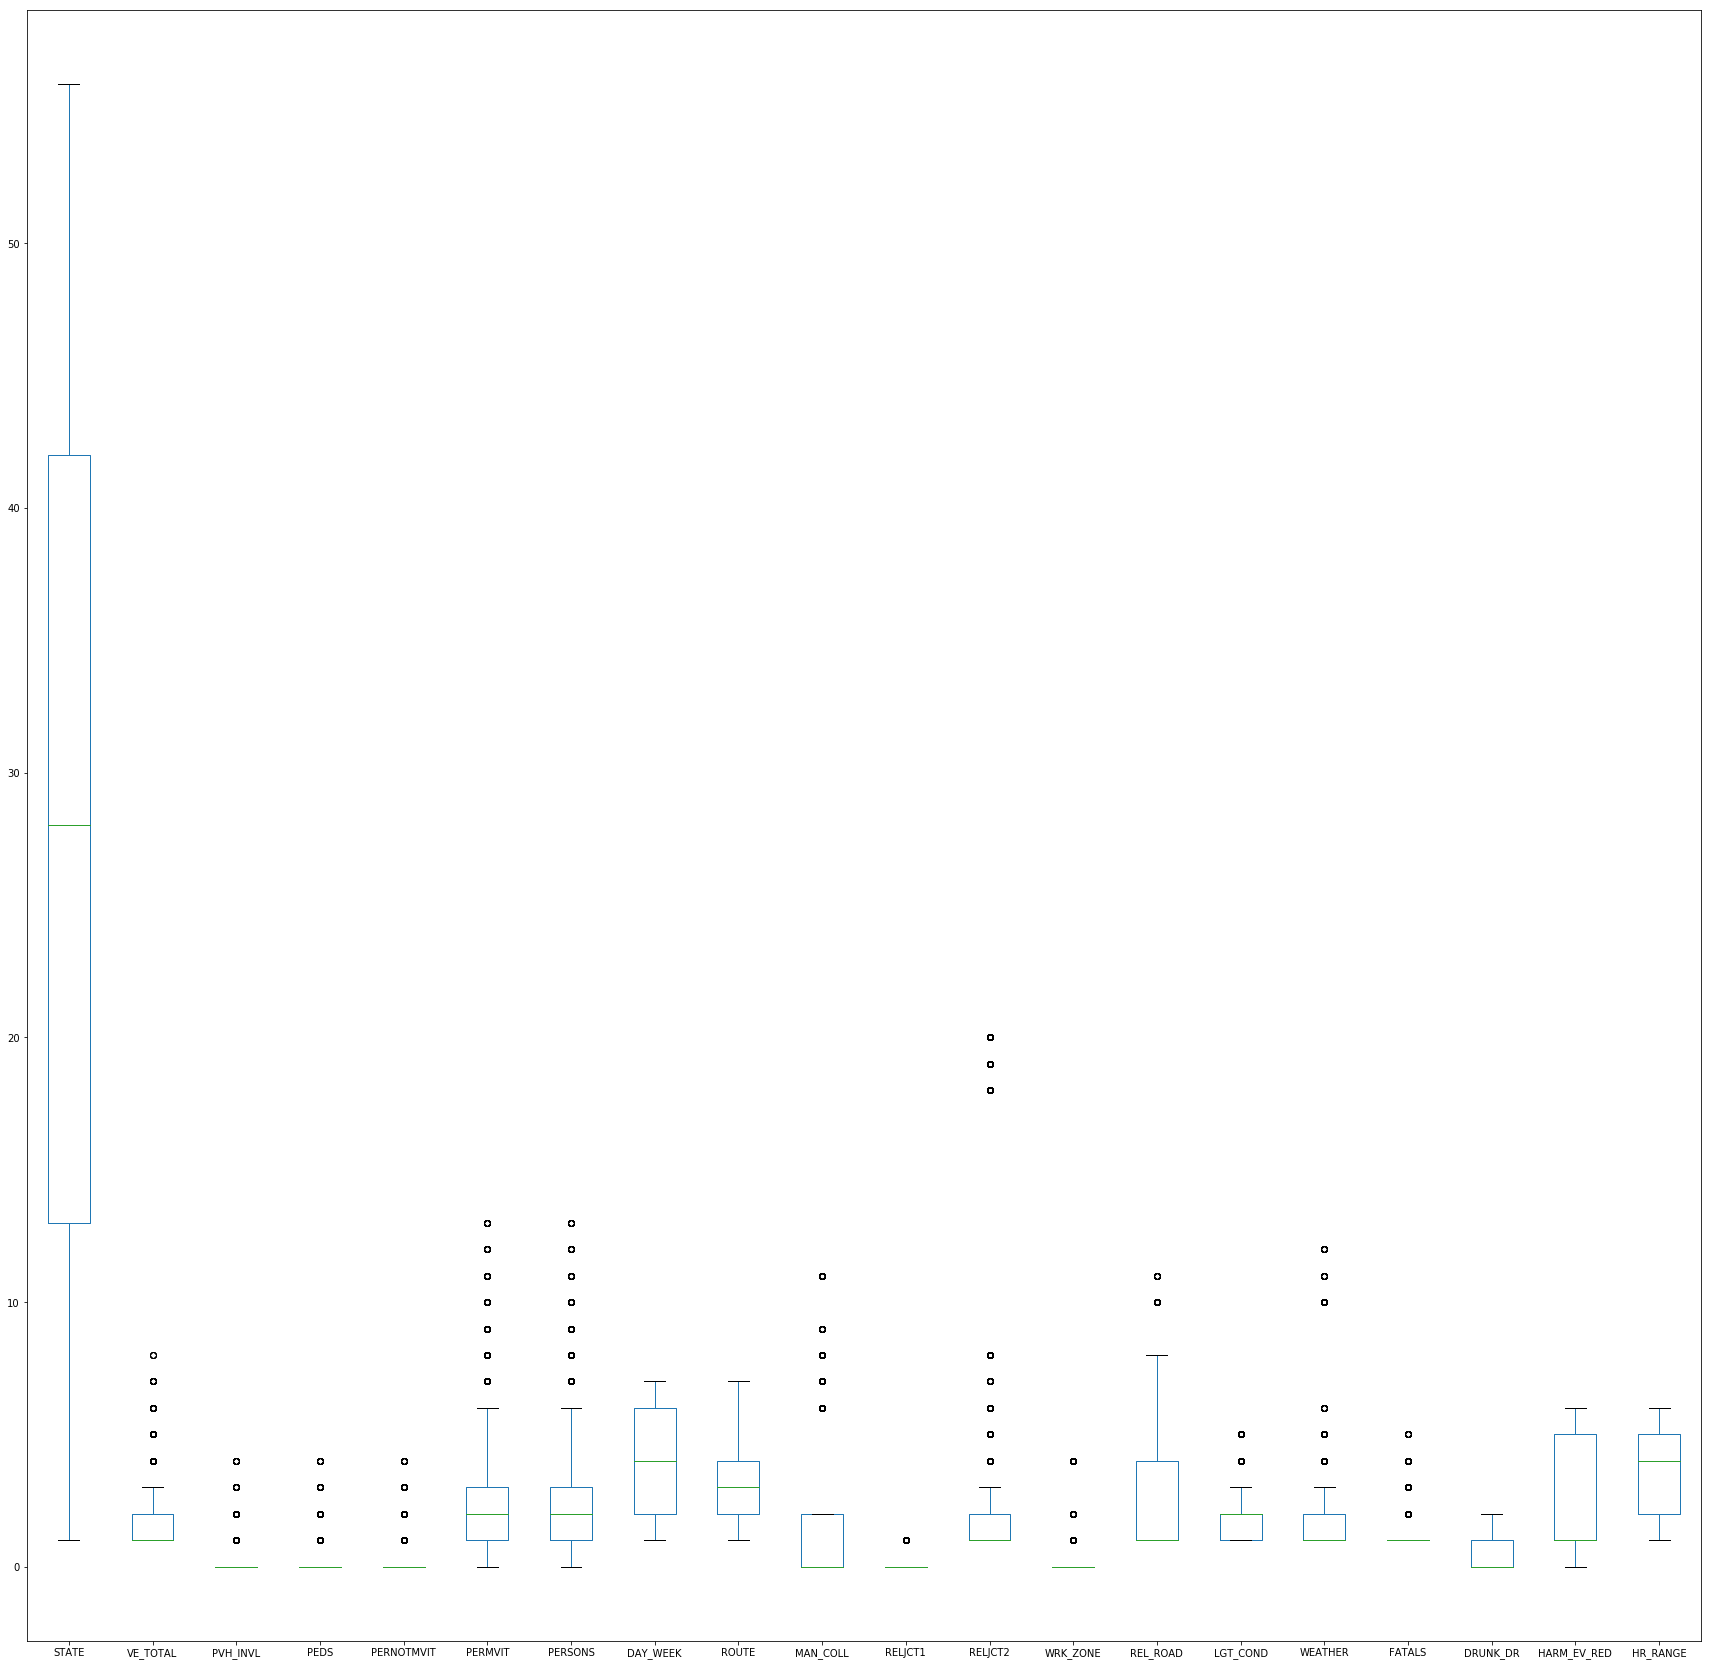

In [51]:
df_accident.plot(kind='box', figsize = (30, 30))

The boxplots above do not differ much from the previously graphed ones, and that's what we expected. The newly created attributes, particularly REGION, HARM_EV_RED and HR_RANGE display a somewhat normal distribution as opposed to the variables from which they were derived, and no points that could be considered as outliers, so from this standpoint, the discretization was a good choice. 

#### Is weather the cause for most fatalities?

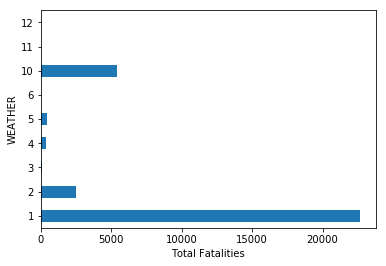

In [52]:
#df_reduced.plot(x='HR_RANGE', y = 'FATALS', kind = 'scatter')

df_WTR= df_accident.groupby(by=['WEATHER'])

# Sum number of Fatalities
fatal_weather = df_WTR.FATALS.sum()

# Graph Chart
plt.xlabel('Total Fatalities')
g_fatal_weather = fatal_weather.plot(kind='barh')

The bar plot above is quite interesting as it shows that at least for the year 2015, about 25,000 fatalities were not related to bad weather (0, means no  additional weather conditions). About 2,500 were caused by rainy conditions (2), less than 2,000 by either snow (4), fog or smoke(5), and quite interesting more than 5,000 occur under cloudy (10) conditions. 

#### Is the lighting condition a main cause for accidents with a great number of fatalities?

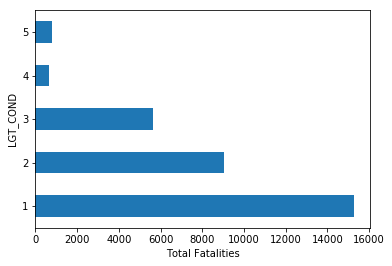

In [53]:


df_lgt= df_accident.groupby(by=['LGT_COND'])

# Sum number of Fatalities
fatal_cond = df_lgt.FATALS.sum()

# Graph Chart
plt.xlabel('Total Fatalities')
g_fatal_cond = fatal_cond.plot(kind='barh')

Based on the above graph, we can argue that most accidents in which there were about 14,500 deaths that happened in plain daylight (0). Complete darkeness (2) was the cause for more than 8,000 accidents in 2015, while partial darkness (3) was the cause of almost 6,000 fatalities. 

#### Weather and tota number accidents

We have already seen that most fatalities happen under normal weather conditions, but what about the total number accidents?

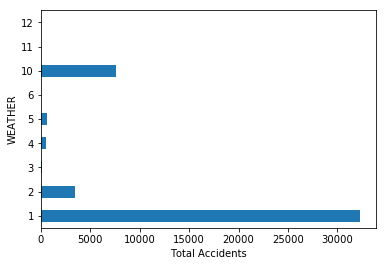

In [54]:

df_weath= df_accident.groupby(by=['WEATHER'])

# Sum number of Fatalities
fatal_accidents = df_weath.VE_TOTAL.sum()

# Graph Chart
plt.xlabel('Total Accidents')
g_fatal_accidents = fatal_accidents.plot(kind='barh')

At first sight the bar plots between WEATHER and FATALS, and WEATHER and VE_TOTAL look alike. But if we look beyond appearances, it is possible to see that the number of ttotal accidents under normal weather conditions in the year 2015 exceed the 30,000 occurrences; there were about 25,000 fatalities that happened under the same conditions. Also there were more than 3,000 total accidents that happened due to the rain (2) --in comparison to about 2,500 fatalities under the same condition--, and about 7,500 under cloudy (10) conditions --a little over 5,000 fatalities happened under the same conditions. 

#### Deadly states

Are there any states that concentrate a vast number of the total fatalities due to traffic accidents? We tend to believe that states with a higher concentration of inhabitants will result in a higher number of fatalities.  

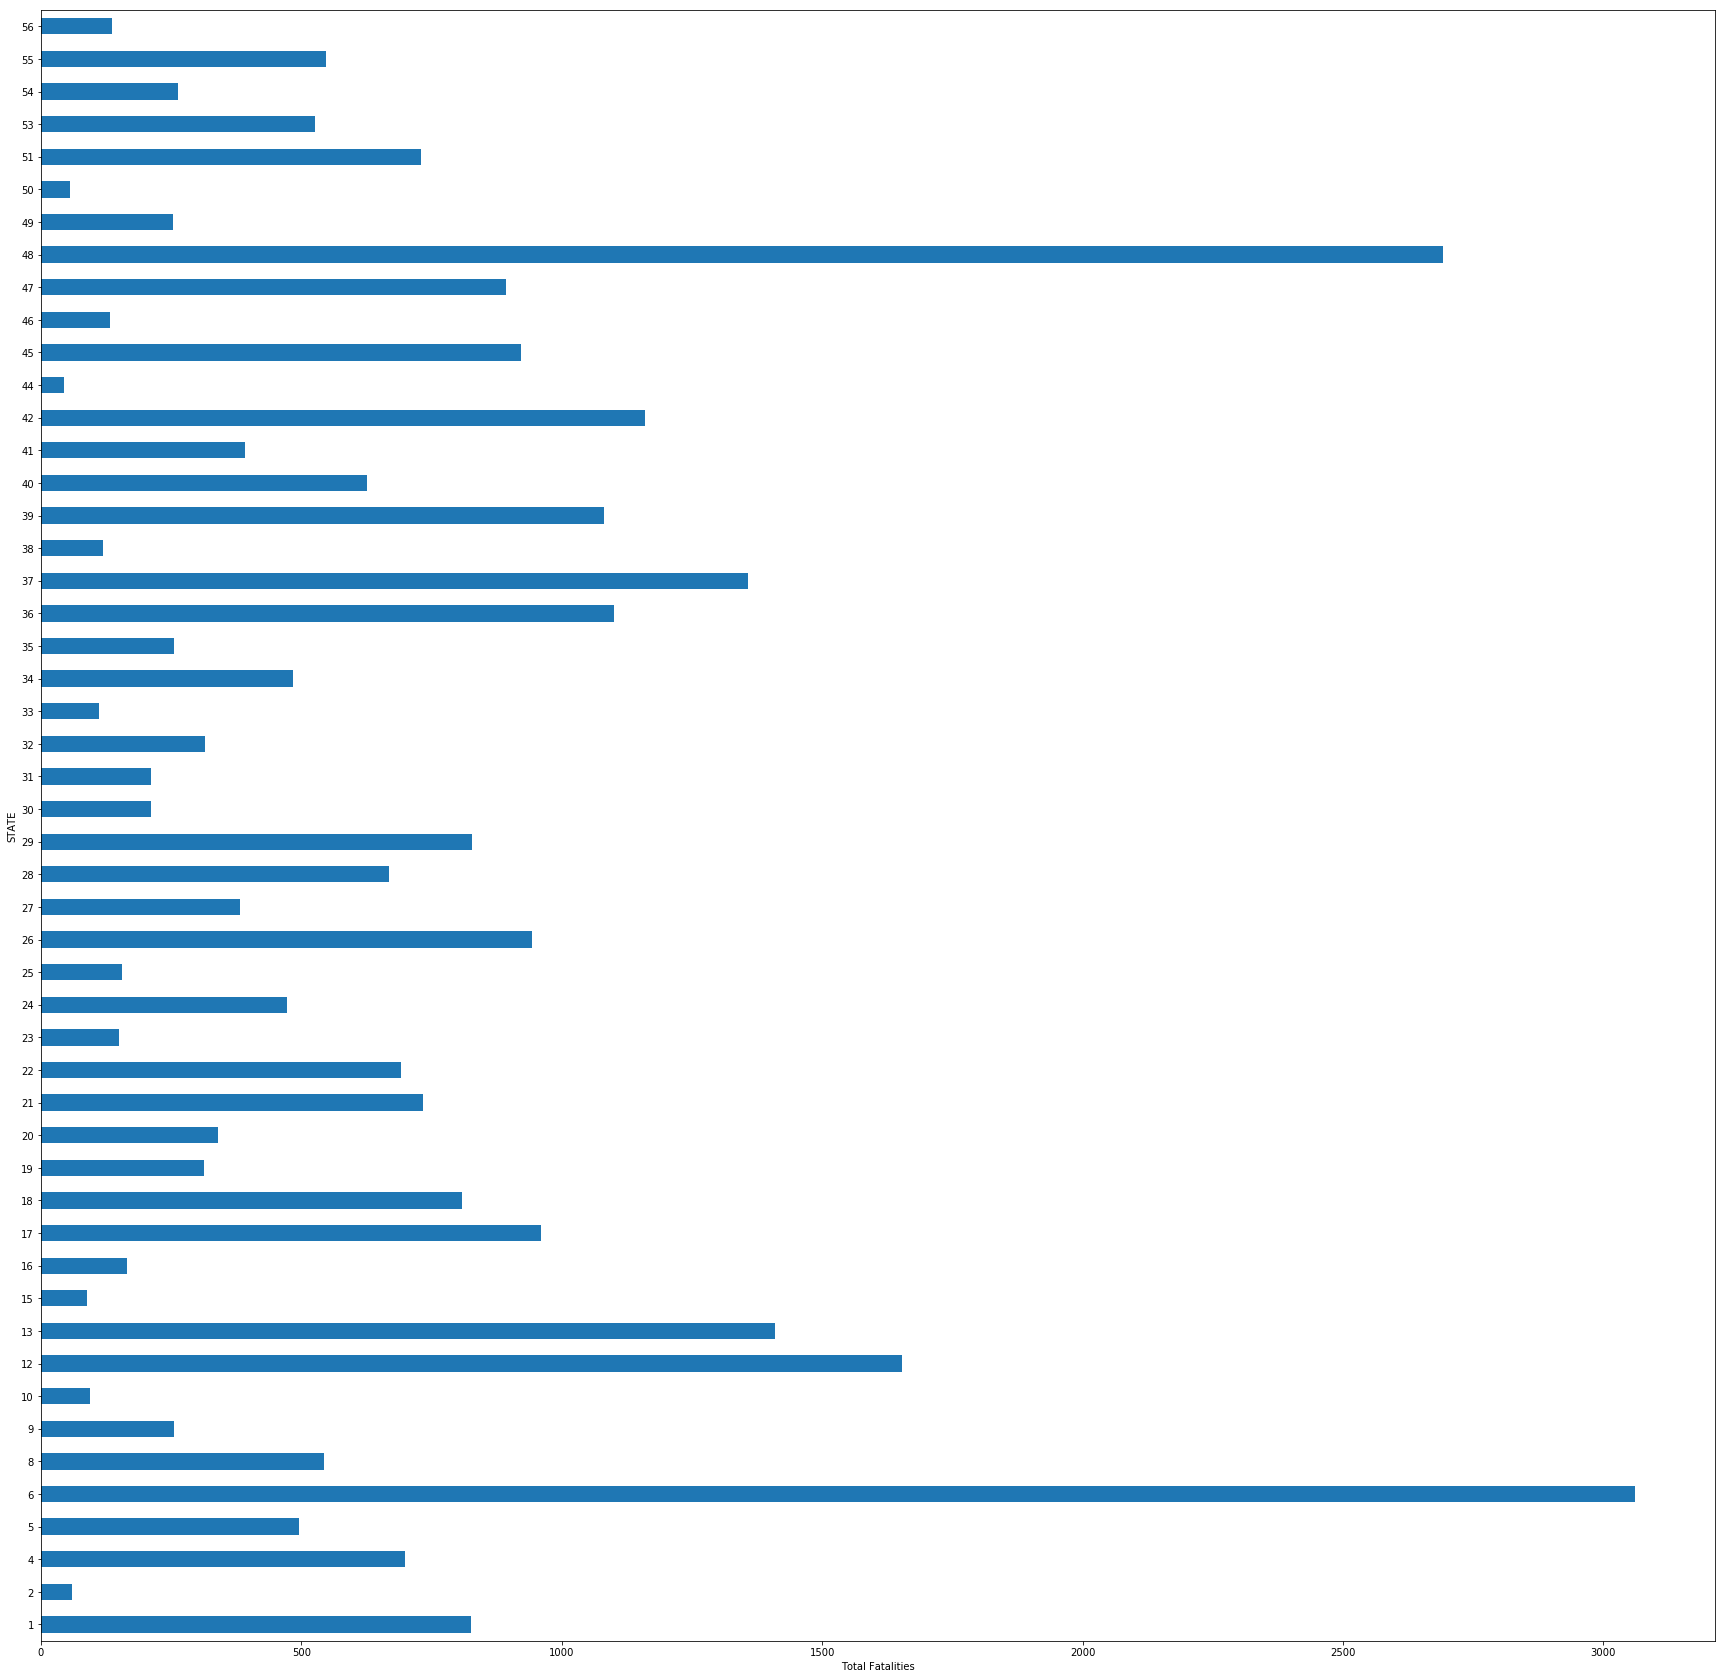

In [55]:
# create a temporary data frame, grouping data by state 

df_st= df_accident.groupby(by=['STATE'])

# Sum number of Fatalities on a new variable that will be used to plot
fatal_states = df_st.FATALS.sum()

# Graph Chart
plt.xlabel('Total Fatalities')
g_fatal_states = fatal_states.plot(kind='barh', figsize = (30,30))

Data shows that for the year 2015, Calirofnia (6) concentrated a little over 3,000 of the total fatalities, followed by Texas (48) with about 2,750. Alaska (2) presented the lowest fatality numbers at less than 100, but it is important to put in perspective the number of inhabitants of Alaska (737,709) in comparison to CA (39 million) and TX (27 million), and with the rest of the states to determine if in fact is significant.

#### Creation of df_acc_dum data frame

This particular dataframe will store the categorical attributes to which we will perform a one-hot encoding. Then, we will drop the attributes from which they were derived. 

In [56]:
df_acc_dum = df_accident.copy(deep=True)

#### One-hot encoding of df_acc_dum categoricals

In [57]:
# Create dummy variable from STATE attribute
#st_df = pd.get_dummies(df_acc_dum.STATE,prefix='ST')
#df_acc_dum = pd.concat((df_acc_dum, st_df), axis =1)

In [58]:
# Create dummy variable from ROUTE attribute
rte_df = pd.get_dummies(df_acc_dum.ROUTE,prefix='ROUTE')
df_acc_dum = pd.concat((df_acc_dum, rte_df), axis =1)

In [59]:
# Create dummy variable from HARM_EV attribute
harm_ev_df = pd.get_dummies(df_acc_dum.HARM_EV_RED,prefix='HARM_RED')
df_acc_dum = pd.concat((df_acc_dum, harm_ev_df), axis =1)

In [60]:
# Create dummy variable from RELJCT2 attribute
rjct_df = pd.get_dummies(df_acc_dum.RELJCT2,prefix='RELJCT2')
df_acc_dum = pd.concat((df_acc_dum, rjct_df), axis =1)

In [61]:
# Create dummy variable from WRK_ZONE attribute
wzone_df = pd.get_dummies(df_acc_dum.WRK_ZONE,prefix='WRK_ZONE')
df_acc_dum = pd.concat((df_acc_dum, wzone_df), axis =1)

In [62]:
# Create dummy variable from REL_ROAD attribute
rrd_df = pd.get_dummies(df_acc_dum.REL_ROAD,prefix='REL_ROAD')
df_acc_dum = pd.concat((df_acc_dum, rrd_df), axis =1)

In [63]:
# Create dummy variable from LGT_COND attribute
lcond_df = pd.get_dummies(df_acc_dum.LGT_COND,prefix='LGT_COND')
df_acc_dum = pd.concat((df_acc_dum, lcond_df), axis =1)

In [64]:
# Create dummy variable from WEATHER attribute
wth_df = pd.get_dummies(df_acc_dum.WEATHER,prefix='WEATHER')
df_acc_dum = pd.concat((df_acc_dum, wth_df), axis =1)

In [65]:
# Create dummy variable from DAY_WEEK attribute
daywk_df = pd.get_dummies(df_acc_dum.DAY_WEEK,prefix='DAY_WEEK')
df_acc_dum = pd.concat((df_acc_dum, daywk_df), axis =1)

In [66]:
# Create dummy variable from HR_RANGE attribute
h_range = pd.get_dummies(df_acc_dum.HR_RANGE,prefix='HR_RANGE')
df_acc_dum = pd.concat((df_acc_dum, h_range), axis =1)

In [67]:
# # Create dummy variable from MAN_COLL attribute
m_coll = pd.get_dummies(df_acc_dum.MAN_COLL,prefix='MAN_COLL')
df_acc_dum = pd.concat((df_acc_dum, m_coll), axis =1)

In [68]:
# To clean df_accident, drop those attributes from which the dummy variables were derived
    
if 'ROUTE' in df_acc_dum:
    del df_acc_dum['ROUTE'] 

    
if 'HARM_EV' in df_acc_dum:
    del df_acc_dum['HARM_EV_RED'] 
    
if 'RELJCT2' in df_acc_dum:
    del df_acc_dum['RELJCT2'] 

    
if 'WRK_ZONE' in df_acc_dum:
    del df_acc_dum['WRK_ZONE'] 
    
if 'REL_ROAD' in df_acc_dum:
    del df_acc_dum['REL_ROAD'] 
    
if 'LGT_COND' in df_acc_dum:
    del df_acc_dum['LGT_COND'] 
    
if 'WEATHER' in df_acc_dum:
    del df_acc_dum['WEATHER'] 
    

if 'DAY_WEEK' in df_acc_dum:
    del df_acc_dum['DAY_WEEK']
    
if 'HR_RANGE' in df_acc_dum:
    del df_acc_dum['HR_RANGE']

    
if 'MAN_COLL' in df_acc_dum:
    del df_acc_dum['MAN_COLL']
    

In [69]:
print ('The number of rows is       ', df_acc_dum.shape[0])
print ('The number of attributes is ', df_acc_dum.shape[1])

The number of rows is        28823
The number of attributes is  85


By perfoming one-hot encoding the number of attributes rose to 85. 

In [70]:
df_acc_dum.describe(include='all')

,STATE,VE_TOTAL,PVH_INVL,PEDS,PERNOTMVIT,PERMVIT,PERSONS,RELJCT1,FATALS,DRUNK_DR,...,HR_RANGE_5,HR_RANGE_6,MAN_COLL_0,MAN_COLL_1,MAN_COLL_2,MAN_COLL_6,MAN_COLL_7,MAN_COLL_8,MAN_COLL_9,MAN_COLL_11
count,28823.000000,28823.000000,28823.000000,28823.000000,28823.000000,28823.000000,28823.000000,28823.000000,28823.000000,28823.000000,...,28823.000000,28823.000000,28823.000000,28823.000000,28823.000000,28823.000000,28823.000000,28823.000000,28823.000000,28823.000000
mean,27.862436,1.551435,0.031676,0.205149,0.212816,2.269160,2.276828,0.043021,1.089963,0.281997,...,0.222045,0.200881,0.612011,0.069875,0.105124,0.182354,0.016168,0.010651,0.001318,0.002498
std,16.182681,0.740342,0.221970,0.442517,0.458635,1.619565,1.621389,0.202908,0.351929,0.466114,...,0.415628,0.400666,0.487300,0.254940,0.306719,0.386143,0.126122,0.102655,0.036286,0.049918
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,28.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,42.000000,2.000000,0.000000,0.000000,0.000000,3.000000,3.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,56.000000,8.000000,4.000000,4.000000,4.000000,13.000000,13.000000,1.000000,5.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Creation of df_reg

This dataframe will differ from df_accident in the sense that instead of containing STATE, it will contain a discretized version of it, called REGION, as we had already explained.  

In [71]:
df_reg = df_accident.copy(deep=True)

# We decided to create a REGION attribute considering that the STATE attribute had 50 levels, which we will use only
# as a reference, whereas REGION can allow us to interpret, discover and create new relationships. 
# We decided to group states in only four regions: West (1), Midwest (2), South (3) and Northeast (4), as it is done in
# https://en.wikipedia.org/wiki/List_of_regions_of_the_United_States. 
df_reg['REGION'] = 0

# Add states according to the region where they belong:
df_reg['REGION'][df_reg['STATE'] == 1] = 3
df_reg['REGION'][df_reg['STATE'] == 2] = 1
df_reg['REGION'][df_reg['STATE'] == 4] = 1
df_reg['REGION'][df_reg['STATE'] == 5] = 3
df_reg['REGION'][df_reg['STATE'] == 6] = 1
df_reg['REGION'][df_reg['STATE'] == 8] = 1
df_reg['REGION'][df_reg['STATE'] == 9] = 4
df_reg['REGION'][df_reg['STATE'] == 10] = 4
df_reg['REGION'][df_reg['STATE'] == 12] = 3
df_reg['REGION'][df_reg['STATE'] == 13] = 3
df_reg['REGION'][df_reg['STATE'] == 15] = 1
df_reg['REGION'][df_reg['STATE'] == 16] = 1
df_reg['REGION'][df_reg['STATE'] == 17] = 2
df_reg['REGION'][df_reg['STATE'] == 18] = 2
df_reg['REGION'][df_reg['STATE'] == 19] = 2
df_reg['REGION'][df_reg['STATE'] == 20] = 2
df_reg['REGION'][df_reg['STATE'] == 21] = 3
df_reg['REGION'][df_reg['STATE'] == 22] = 3
df_reg['REGION'][df_reg['STATE'] == 23] = 4
df_reg['REGION'][df_reg['STATE'] == 24] = 3
df_reg['REGION'][df_reg['STATE'] == 25] = 4
df_reg['REGION'][df_reg['STATE'] == 26] = 4
df_reg['REGION'][df_reg['STATE'] == 27] = 4
df_reg['REGION'][df_reg['STATE'] == 28] = 3
df_reg['REGION'][df_reg['STATE'] == 29] = 4
df_reg['REGION'][df_reg['STATE'] == 30] = 1
df_reg['REGION'][df_reg['STATE'] == 31] = 4
df_reg['REGION'][df_reg['STATE'] == 32] = 1
df_reg['REGION'][df_reg['STATE'] == 33] = 4
df_reg['REGION'][df_reg['STATE'] == 34] = 4
df_reg['REGION'][df_reg['STATE'] == 35] = 1
df_reg['REGION'][df_reg['STATE'] == 36] = 4
df_reg['REGION'][df_reg['STATE'] == 37] = 3
df_reg['REGION'][df_reg['STATE'] == 38] = 2
df_reg['REGION'][df_reg['STATE'] == 39] = 2
df_reg['REGION'][df_reg['STATE'] == 40] = 3
df_reg['REGION'][df_reg['STATE'] == 41] = 1
df_reg['REGION'][df_reg['STATE'] == 42] = 4
df_reg['REGION'][df_reg['STATE'] == 44] = 4
df_reg['REGION'][df_reg['STATE'] == 45] = 3
df_reg['REGION'][df_reg['STATE'] == 46] = 2
df_reg['REGION'][df_reg['STATE'] == 47] = 3
df_reg['REGION'][df_reg['STATE'] == 48] = 3
df_reg['REGION'][df_reg['STATE'] == 49] = 1
df_reg['REGION'][df_reg['STATE'] == 50] = 4
df_reg['REGION'][df_reg['STATE'] == 51] = 3
df_reg['REGION'][df_reg['STATE'] == 53] = 1
df_reg['REGION'][df_reg['STATE'] == 54] = 3
df_reg['REGION'][df_reg['STATE'] == 55] = 2
df_reg['REGION'][df_reg['STATE'] == 56] = 1

In [72]:
if 'STATE' in df_reg:
    del df_reg['STATE']

In [73]:
df_reg.describe(include='all')

,VE_TOTAL,PVH_INVL,PEDS,PERNOTMVIT,PERMVIT,PERSONS,DAY_WEEK,ROUTE,MAN_COLL,RELJCT1,RELJCT2,WRK_ZONE,REL_ROAD,LGT_COND,WEATHER,FATALS,DRUNK_DR,HARM_EV_RED,HR_RANGE,REGION
count,28823.000000,28823.000000,28823.000000,28823.000000,28823.000000,28823.000000,28823.000000,28823.000000,28823.000000,28823.000000,28823.000000,28823.000000,28823.000000,28823.000000,28823.000000,28823.000000,28823.000000,28823.000000,28823.000000,28823.000000
mean,1.551435,0.031676,0.205149,0.212816,2.269160,2.276828,4.097006,3.373903,1.611977,0.043021,2.000312,0.033029,2.195122,1.815182,2.733893,1.089963,0.281997,2.532561,3.819484,2.628665
std,0.740342,0.221970,0.442517,0.458635,1.619565,1.621389,2.086971,1.609935,2.517900,0.202908,2.848601,0.284969,1.585693,0.972106,3.389701,0.351929,0.466114,2.066207,1.702918,1.022042
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
25%,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,2.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,2.000000
50%,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,4.000000,3.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,1.000000,1.000000,0.000000,1.000000,4.000000,3.000000
75%,2.000000,0.000000,0.000000,0.000000,3.000000,3.000000,6.000000,4.000000,2.000000,0.000000,2.000000,0.000000,4.000000,2.000000,2.000000,1.000000,1.000000,5.000000,5.000000,3.000000
max,8.000000,4.000000,4.000000,4.000000,13.000000,13.000000,7.000000,7.000000,11.000000,1.000000,20.000000,4.000000,11.000000,5.000000,12.000000,5.000000,2.000000,6.000000,6.000000,4.000000


In [74]:
df_reg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28823 entries, 1 to 28823
Data columns (total 20 columns):
VE_TOTAL       28823 non-null int64
PVH_INVL       28823 non-null int64
PEDS           28823 non-null int64
PERNOTMVIT     28823 non-null int64
PERMVIT        28823 non-null int64
PERSONS        28823 non-null int64
DAY_WEEK       28823 non-null int64
ROUTE          28823 non-null int32
MAN_COLL       28823 non-null int32
RELJCT1        28823 non-null int32
RELJCT2        28823 non-null int32
WRK_ZONE       28823 non-null int64
REL_ROAD       28823 non-null int32
LGT_COND       28823 non-null int32
WEATHER        28823 non-null int32
FATALS         28823 non-null int64
DRUNK_DR       28823 non-null int64
HARM_EV_RED    28823 non-null int64
HR_RANGE       28823 non-null int64
REGION         28823 non-null int64
dtypes: int32(7), int64(13)
memory usage: 3.8 MB


#### Creation of df_r_dumm data frame

This dataframe is pretty similar to df_acc_dum in the sense that it also stores the one-hot encoded attributes along with REGION, which will also be one-hot encoded. 

In [75]:
df_r_dumm = df_reg.copy(deep=True)

#### One hot encoding of categorical variables of df_r_dumm

In [76]:
# Create dummy variable from ROUTE attribute
route_df = pd.get_dummies(df_r_dumm.ROUTE,prefix='ROUTE')
df_r_dumm = pd.concat((df_r_dumm, route_df), axis =1)

In [77]:
# Create dummy variable from HARM_EV attribute
harm_df = pd.get_dummies(df_r_dumm.HARM_EV_RED,prefix='HARM_RED')
df_r_dumm = pd.concat((df_r_dumm, harm_df), axis =1)

In [78]:
# Create dummy variable from RELJCT2 attribute
reljct_df = pd.get_dummies(df_r_dumm.RELJCT2,prefix='RELJCT2')
df_r_dumm = pd.concat((df_r_dumm, reljct_df), axis =1)

In [79]:
# Create dummy variable from WRK_ZONE attribute
wrk_df = pd.get_dummies(df_r_dumm.WRK_ZONE,prefix='WRK_ZONE')
df_r_dumm = pd.concat((df_r_dumm, wrk_df), axis =1)

In [80]:
# Create dummy variable from REL_ROAD attribute
relrd_df = pd.get_dummies(df_r_dumm.REL_ROAD,prefix='REL_ROAD')
df_r_dumm = pd.concat((df_r_dumm, relrd_df), axis =1)

In [81]:
# Create dummy variable from LGT_COND attribute
lgt_df = pd.get_dummies(df_r_dumm.LGT_COND,prefix='LGT_COND')
df_r_dumm = pd.concat((df_r_dumm, lgt_df), axis =1)

In [82]:
# Create dummy variable from WEATHER attribute
wtr_df = pd.get_dummies(df_r_dumm.WEATHER,prefix='WEATHER')
df_r_dumm = pd.concat((df_r_dumm, wtr_df), axis =1)

In [83]:
# Create dummy variable from DAY_WEEK attribute
wk_df = pd.get_dummies(df_r_dumm.DAY_WEEK,prefix='DAY_WEEK')
df_r_dumm = pd.concat((df_r_dumm, wk_df), axis =1)

In [84]:
# Create dummy variable from HR_RANGE attribute
hr_range = pd.get_dummies(df_r_dumm.HR_RANGE,prefix='HR_RANGE')
df_r_dumm = pd.concat((df_r_dumm, hr_range), axis =1)

In [85]:
# # Create dummy variable from REGION attribute
df_region = pd.get_dummies(df_r_dumm.REGION,prefix='REGION')
df_r_dumm = pd.concat((df_r_dumm, df_region), axis =1)

In [86]:
# # Create dummy variable from MAN_COLL attribute
man_coll = pd.get_dummies(df_r_dumm.MAN_COLL,prefix='MAN_COLL')
df_r_dumm = pd.concat((df_r_dumm, man_coll), axis =1)

In [87]:
# To clean df_accident, drop those attributes from which the dummy variables were derived
    
if 'ROUTE' in df_r_dumm:
    del df_r_dumm['ROUTE'] 

    
if 'HARM_EV' in df_r_dumm:
    del df_r_dumm['HARM_EV_RED'] 
    
if 'RELJCT2' in df_r_dumm:
    del df_r_dumm['RELJCT2'] 

    
if 'WRK_ZONE' in df_r_dumm:
    del df_r_dumm['WRK_ZONE'] 
    
if 'REL_ROAD' in df_r_dumm:
    del df_r_dumm['REL_ROAD'] 
    
if 'LGT_COND' in df_r_dumm:
    del df_r_dumm['LGT_COND'] 
    
if 'WEATHER' in df_r_dumm:
    del df_r_dumm['WEATHER'] 
    

if 'DAY_WEEK' in df_r_dumm:
    del df_r_dumm['DAY_WEEK']
    
if 'HR_RANGE' in df_r_dumm:
    del df_r_dumm['HR_RANGE']
    
if 'REGION' in df_r_dumm:
    del df_r_dumm['REGION']
    
if 'MAN_COLL' in df_r_dumm:
    del df_r_dumm['MAN_COLL']
    

In [88]:
print ('The number of rows is       ', df_r_dumm.shape[0])
print ('The number of attributes is ', df_r_dumm.shape[1])

The number of rows is        28823
The number of attributes is  88


Adding a one-hot encoding of REGION only added 3 columns to the dataset. 

In [89]:
df_r_dumm.describe(include='all')

,VE_TOTAL,PVH_INVL,PEDS,PERNOTMVIT,PERMVIT,PERSONS,RELJCT1,FATALS,DRUNK_DR,HARM_EV_RED,...,REGION_3,REGION_4,MAN_COLL_0,MAN_COLL_1,MAN_COLL_2,MAN_COLL_6,MAN_COLL_7,MAN_COLL_8,MAN_COLL_9,MAN_COLL_11
count,28823.000000,28823.000000,28823.000000,28823.000000,28823.000000,28823.000000,28823.000000,28823.000000,28823.000000,28823.000000,...,28823.000000,28823.000000,28823.000000,28823.000000,28823.000000,28823.000000,28823.000000,28823.000000,28823.000000,28823.000000
mean,1.551435,0.031676,0.205149,0.212816,2.269160,2.276828,0.043021,1.089963,0.281997,2.532561,...,0.458106,0.192034,0.612011,0.069875,0.105124,0.182354,0.016168,0.010651,0.001318,0.002498
std,0.740342,0.221970,0.442517,0.458635,1.619565,1.621389,0.202908,0.351929,0.466114,2.066207,...,0.498250,0.393907,0.487300,0.254940,0.306719,0.386143,0.126122,0.102655,0.036286,0.049918
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,0.000000,0.000000,0.000000,3.000000,3.000000,0.000000,1.000000,1.000000,5.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,4.000000,4.000000,4.000000,13.000000,13.000000,1.000000,5.000000,2.000000,6.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Modeling and Evaluation (50 points total)

Different tasks will require different evaluation methods. Be as thorough as possible when analyzing
the data you have chosen and use visualizations of the results to explain the performance and
expected outcomes whenever possible. Guide the reader through your analysis with plenty of
discussion of the results.

For this task we tried to divide the data from the four dataframes we have creates into 80% train/ 20% test but after more than 4 hours trying, we just could not make it work properly. 

We tried dividing the different dataframes into X and y numpy arrays, then creating a loop to split them into X_train, y_train, X_test, and y_test; we also tried train_test_split but the clustering methods returned errors when using numpy arrays that we were unable to fix given the time we had to finish the project. We are sure that having more time would had also allowed us to find a solution for our issue. 

Therefore, we decided to keep out dataframes as pandas, but then again splitting them turn out to be a tall order that with ourr time constraint we could not figure out. So the dataframes were left intact. 

We, then, decided to test how KMeans behave when using a dataframe with no one-hot encoded attributes, and when using one with one-hot encoded ones to decide which one will work better based on their accuracy and deviation. Thus choosing the best performing one to perform other clustering methods such as: agglomerative and DBSCAN. 

#### Modeling of dataframe df_accident

We used Stratified K folds with 10 splits as our cross-validation. And created an object using Random Forest with 150 estimators. We will not change its parameters, instead to train our data we will try KMeans with different dataframes, different attributes to decide which yields the best acuracy and deviation combined. Then, we will use that particular one to perform other cluster methods and try different validations of it.  

In [90]:
%%time 

from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier

cv = StratifiedKFold(n_splits=10)

clf = RandomForestClassifier(n_estimators=150,random_state=1)



X = df_accident[['STATE', 'VE_TOTAL', 'DAY_WEEK', 'HR_RANGE', 
                 'MAN_COLL', 'LGT_COND', 'WEATHER', 'DRUNK_DR']]

y = df_accident['FATALS']

acc = cross_val_score(clf,X,y=y,cv=cv)

print ("Average accuracy = ", acc.mean()*100, "+-", acc.std()*100)



Average accuracy =  90.0391601924 +- 1.18571260271
Wall time: 28 s


In [91]:

X1 = df_accident[['PERSONS', 'PERMVIT']]
X2 = df_accident[['STATE', 'VE_TOTAL', 'DAY_WEEK', 'HR_RANGE', 
                 'MAN_COLL', 'LGT_COND', 'WEATHER', 'DRUNK_DR']]

params = []
for n_person in range(3,5):
    for n_permvit in range(3,5):
        # get the first clustering
        cls_person = KMeans(n_clusters=n_person, init='k-means++',random_state=1)
        cls_person.fit(X1)
        newfeature_person = cls_person.labels_ # the labels from kmeans clustering

        # append on the second clustering
        cls_permvit = KMeans(n_clusters=n_permvit, init='k-means++',random_state=1)
        cls_permvit.fit(X2)
        newfeature_permvit = cls_permvit.labels_ # the labels from kmeans clustering
        
        # append to dataframe
        y = df_accident['FATALS']
        X = df_accident[['STATE', 'VE_TOTAL', 'PEDS', 'PERMVIT', 'PERSONS', 'DAY_WEEK', 'HR_RANGE', 
                 'MAN_COLL', 'LGT_COND', 'WEATHER', 'DRUNK_DR']]
        X = np.column_stack((X,pd.get_dummies(newfeature_person),pd.get_dummies(newfeature_permvit)))

        acc = cross_val_score(clf,X,y=y,cv=cv)
        params.append((n_person,n_permvit,acc.mean()*100,acc.std()*100)) # save state

        print ("Clusters",n_person,n_permvit,"Average accuracy = ", acc.mean()*100, "+-", acc.std()*100)
        
        

Clusters 3 3 Average accuracy =  91.1772625529 +- 0.809078230501
Clusters 3 4 Average accuracy =  91.2708692553 +- 0.53649571456
Clusters 4 3 Average accuracy =  91.2605368608 +- 0.725835773996
Clusters 4 4 Average accuracy =  91.3090624795 +- 0.544059737054


Based on the above results, it seems that 3 clusters for PERSONS and 4 for PERMVIT land the highest accuracy (91.27) and lowest deviation (0.54). Next we will use the number of clusters that seemed appropriate to perform Kmeans on those two attributes together. 

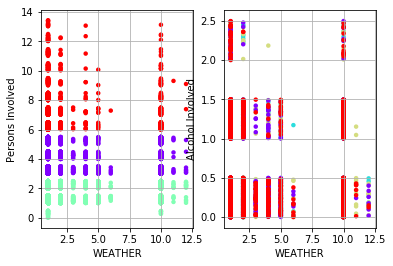

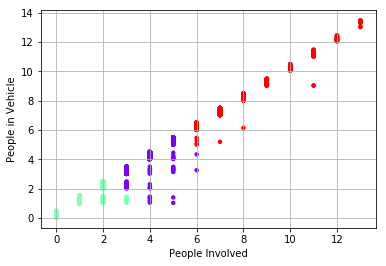

In [92]:
n_person=3
n_permvit=4

X2 = df_accident[['STATE', 'VE_TOTAL','PERSONS', 'DAY_WEEK', 'HR_RANGE', 
                 'MAN_COLL', 'LGT_COND', 'WEATHER', 'DRUNK_DR']]

cls_person = KMeans(n_clusters=n_person, init='k-means++',random_state=1)
cls_person.fit(X1)
newfeature_person = cls_person.labels_ # the labels from kmeans clustering

# append on the second clustering
cls_permvit = KMeans(n_clusters=n_permvit, init='k-means++',random_state=1)
cls_permvit.fit(X2)
newfeature_permvit = cls_permvit.labels_ # the labels from kmeans clustering

plt.figure()
plt.subplot(1,2,1)
X2=X2.values
plt.scatter(X2[:, 7], X2[:, 2]+np.random.random(X2[:, 7].shape)/2, c=newfeature_person, cmap=plt.cm.rainbow, s=20, linewidths=0)
plt.xlabel('WEATHER'), plt.ylabel('Persons Involved')
plt.grid()

plt.subplot(1,2,2)
plt.scatter(X2[:, 7], X2[:, 8]+np.random.random(X2[:, 7].shape)/2, c=newfeature_permvit, cmap=plt.cm.rainbow, s=20, linewidths=0)
plt.xlabel('WEATHER'), plt.ylabel('Alcohol Involved')
plt.grid()

X1=X1.values
plt.figure()
plt.scatter(X1[:, 0], X1[:, 1]+np.random.random(X1[:, 0].shape)/2, c=newfeature_person, cmap=plt.cm.rainbow, s=20, linewidths=0)
plt.xlabel('People Involved'), plt.ylabel('People in Vehicle')
plt.grid()

Based on the above graph, PERSONS (people in vehicle) and PERMVIT (people involved) can be easily clustered in 3. PERSONS and WEATHER also show three, somehow easily defined clusters. WEATHER and Alcohol involved is a different story as only one cluster (in red) can be easily defined. 

Next we will try performing KMeans on just PERSONS. 

In [93]:
X3 = df_accident[['PERSONS', 'PERMVIT']]
X4 = df_accident[['STATE', 'VE_TOTAL', 'DAY_WEEK', 'HR_RANGE', 
                 'MAN_COLL', 'LGT_COND', 'WEATHER', 'DRUNK_DR']]

params = []
for n_person in range(3,6):
        # get the first clustering
        cls_person = KMeans(n_clusters=n_person, init='k-means++',random_state=1)
        cls_person.fit(X3)
        newfeature_person = cls_person.labels_ # the labels from kmeans clustering


        y = df_accident['FATALS']
        X = df_accident[['STATE', 'VE_TOTAL', 'PEDS', 'PERMVIT', 'PERSONS', 'DAY_WEEK', 'HR_RANGE', 
                 'MAN_COLL', 'LGT_COND', 'WEATHER', 'DRUNK_DR']]
        X = np.column_stack((X,pd.get_dummies(newfeature_person)))

        acc = cross_val_score(clf,X,y=y,cv=cv)
        params.append((n_person,acc.mean()*100,acc.std()*100)) # save state

        print ("Clusters",n_person,"Average accuracy = ", acc.mean()*100, "+-", acc.std()*100)
        
        

Clusters 3 Average accuracy =  91.4790291582 +- 0.245862662762
Clusters 4 Average accuracy =  91.3819008699 +- 0.307578533487


We can see that performing KMeans on just PERSONS did increase the accuracy and lower the deviation, making it tighter. For graphing the clusters we will use only 3, which is the number that provides the higher accuracy/ lower deviation. 

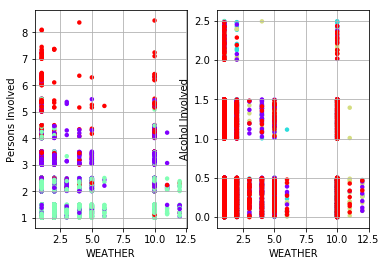

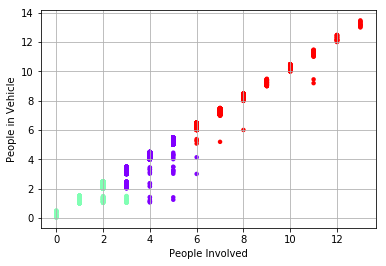

In [94]:
n_person=3


X4 = df_accident[['STATE', 'VE_TOTAL','PERSONS', 'DAY_WEEK', 'HR_RANGE', 
                 'MAN_COLL', 'LGT_COND', 'WEATHER', 'DRUNK_DR']]

cls_person = KMeans(n_clusters=n_person, init='k-means++',random_state=1)
cls_person.fit(X3)
newfeature_person = cls_person.labels_ # the labels from kmeans clustering

plt.figure()
plt.subplot(1,2,1)
X4=X4.values
plt.scatter(X4[:, 7], X4[:, 1]+np.random.random(X4[:, 1].shape)/2, c=newfeature_person, cmap=plt.cm.rainbow, s=20, linewidths=0)
plt.xlabel('WEATHER'), plt.ylabel('Persons Involved')
plt.grid()

plt.subplot(1,2,2)
plt.scatter(X4[:, 7], X4[:, 8]+np.random.random(X4[:, 1].shape)/2, c=newfeature_permvit, cmap=plt.cm.rainbow, s=20, linewidths=0)
plt.xlabel('WEATHER'), plt.ylabel('Alcohol Involved')
plt.grid()

X3=X3.values
plt.figure()
plt.scatter(X3[:, 0], X3[:, 1]+np.random.random(X3[:, 0].shape)/2, c=newfeature_person, cmap=plt.cm.rainbow, s=20, linewidths=0)
plt.xlabel('People Involved'), plt.ylabel('People in Vehicle')
plt.grid()

We chose three clusters because they have the higher accuracy (91.48) and the lowest deviation (0.25). Even tough there isn't a dramatic difference with the previous graph, the clusters in this plot are slightly more defined. 

#### Lighting condition and weather

From the df_accident dataframe we observed that most accidents happen under normal weather and lighting conditions, but there were also a good number that did happen in "unusual" conditions. So we want to know what would happen if we use KMeans on these two attributes (not one-hot encoded) together. 

In [95]:
X5 = df_accident[['LGT_COND', 'WEATHER']]
X6 = df_accident[['STATE', 'PERSONS', 'PERMVIT', 'VE_TOTAL', 'DAY_WEEK', 'HR_RANGE', 
                 'MAN_COLL', 'HARM_EV_RED', 'DRUNK_DR']]

params = []
for n_lgt in range(3,6):
     for n_wthr in range(3,6):
    
        # get the first clustering
        cls_lgt = KMeans(n_clusters=n_lgt, init='k-means++',random_state=1)
        cls_lgt.fit(X5)
        newfeature_lgt = cls_lgt.labels_ # the labels from kmeans clustering

        # append second clustering
        cls_wthr = KMeans(n_clusters=n_wthr, init='k-means++',random_state=1)
        cls_wthr.fit(X6)
        newfeature_wthr = cls_wthr.labels_ # the labels from kmeans clustering

        y = df_accident['FATALS']
        X = df_accident[['STATE', 'PERSONS', 'PERMVIT', 'VE_TOTAL', 'DAY_WEEK', 'HR_RANGE', 
                 'MAN_COLL', 'HARM_EV_RED', 'DRUNK_DR']]
        X = np.column_stack((X,pd.get_dummies(newfeature_lgt),pd.get_dummies(newfeature_wthr) ))

        acc = cross_val_score(clf,X,y=y,cv=cv)
        params.append((n_lgt, n_wthr,acc.mean()*100,acc.std()*100)) # save state

        print ("Clusters",n_lgt, n_wthr, "Average accuracy = ", acc.mean()*100, "+-", acc.std()*100)
        
        

Clusters 3 3 Average accuracy =  91.121791257 +- 0.658452787108
Clusters 3 4 Average accuracy =  91.1009458991 +- 0.64449512011
Clusters 4 3 Average accuracy =  91.1460486592 +- 0.635841301003
Clusters 4 4 Average accuracy =  91.0974845138 +- 0.700248619731


Accuracy haven'e changed much, but the deviation went up again. We attribute this to the fact that both are 

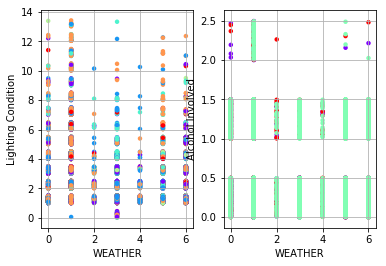

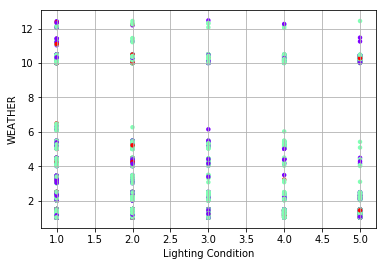

In [96]:
n_lgt=6
n_wthr=3

X6 = df_accident[['STATE', 'PERSONS', 'PERMVIT', 'VE_TOTAL', 'DAY_WEEK', 'HR_RANGE', 
                 'MAN_COLL', 'HARM_EV_RED', 'DRUNK_DR']]

cls_lgt = KMeans(n_clusters=n_lgt, init='k-means++',random_state=1)
cls_lgt.fit(X5)
newfeature_lgt = cls_lgt.labels_

# append on the second clustering
cls_wthr = KMeans(n_clusters=n_wthr, init='k-means++',random_state=1)
cls_wthr.fit(X6)
newfeature_wthr = cls_wthr.labels_ # the labels from kmeans clustering

plt.figure()
plt.subplot(1,2,1)
X6=X6.values
plt.scatter(X6[:, 7], X6[:, 1]+np.random.random(X6[:, 1].shape)/2, c=newfeature_lgt, cmap=plt.cm.rainbow, s=20, linewidths=0)
plt.xlabel('WEATHER'), plt.ylabel('Lighting Condition')
plt.grid()

plt.subplot(1,2,2)
plt.scatter(X6[:, 7], X6[:, 8]+np.random.random(X6[:, 1].shape)/2, c=newfeature_wthr, cmap=plt.cm.rainbow, s=20, linewidths=0)
plt.xlabel('WEATHER'), plt.ylabel('Alcohol Involved')
plt.grid()

X5=X5.values
plt.figure()
plt.scatter(X5[:, 0], X5[:, 1]+np.random.random(X5[:, 0].shape)/2, c=newfeature_person, cmap=plt.cm.rainbow, s=20, linewidths=0)
plt.xlabel('Lighting Condition'), plt.ylabel('WEATHER')
plt.grid()

None of the graphs above display clusterings that are able to be separated at plain sight, the visual is confusing in fact.  We did not know what to expect when performing KMeans on the two categorical attributes that we discretized. 

Only that pertaining to WEATHER and Alcohol involved displays a more defined clustering, in which we can see one big green cluster and a lot of tiny ones. 

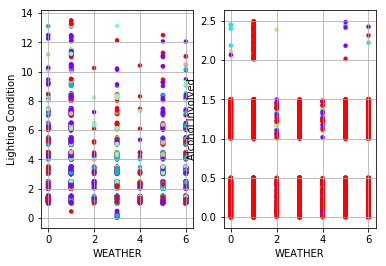

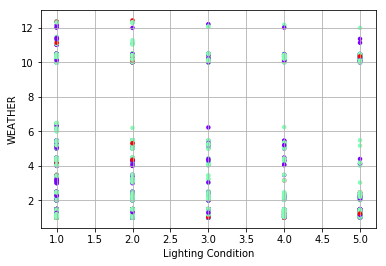

In [97]:
n_lgt=5
n_wthr=4

X6 = df_accident[['STATE', 'PERSONS', 'PERMVIT', 'VE_TOTAL', 'DAY_WEEK', 'HR_RANGE', 
                 'MAN_COLL', 'HARM_EV_RED', 'DRUNK_DR']]

cls_lgt = KMeans(n_clusters=n_lgt, init='k-means++',random_state=1)
cls_lgt.fit(X5)
newfeature_lgt = cls_lgt.labels_

# append on the second clustering
cls_wthr = KMeans(n_clusters=n_wthr, init='k-means++',random_state=1)
cls_wthr.fit(X6)
newfeature_wthr = cls_wthr.labels_ # the labels from kmeans clustering

plt.figure()
plt.subplot(1,2,1)
X6=X6.values
plt.scatter(X6[:, 7], X6[:, 1]+np.random.random(X6[:, 1].shape)/2, c=newfeature_lgt, cmap=plt.cm.rainbow, s=20, linewidths=0)
plt.xlabel('WEATHER'), plt.ylabel('Lighting Condition')
plt.grid()

plt.subplot(1,2,2)
plt.scatter(X6[:, 7], X6[:, 8]+np.random.random(X6[:, 1].shape)/2, c=newfeature_wthr, cmap=plt.cm.rainbow, s=20, linewidths=0)
plt.xlabel('WEATHER'), plt.ylabel('Alcohol Involved')
plt.grid()

X5=X5
plt.figure()
plt.scatter(X5[:, 0], X5[:, 1]+np.random.random(X5[:, 0].shape)/2, c=newfeature_person, cmap=plt.cm.rainbow, s=20, linewidths=0)
plt.xlabel('Lighting Condition'), plt.ylabel('WEATHER')
plt.grid()

#### KMeans with df_acc_dum

These dataframe uses one-hot encoded versions of the categoricals.
We would like to test how does the one-hot encoded versions of LGT_COND and WEATHER work when using KMeans. 

In [98]:
X_1 = df_acc_dum[['LGT_COND_1', 'LGT_COND_2', 'LGT_COND_3', 'LGT_COND_4', 'LGT_COND_5',  'WEATHER_1', 'WEATHER_2',
                 'WEATHER_3', 'WEATHER_4', 'WEATHER_5', 'WEATHER_6', 'WEATHER_10', 'WEATHER_11', 'WEATHER_12']]
X_2 = df_acc_dum[['STATE', 'PERSONS', 'PERMVIT', 'VE_TOTAL', 'DAY_WEEK_1', 'DAY_WEEK_2', 'DAY_WEEK_3', 'DAY_WEEK_4' , 
                  'DAY_WEEK_5', 'DAY_WEEK_6', 'DAY_WEEK_7', 'HR_RANGE_1', 'HR_RANGE_2', 'HR_RANGE_3', 'HR_RANGE_4', 
                  'HR_RANGE_5','HR_RANGE_6', 'MAN_COLL_0','MAN_COLL_1', 'MAN_COLL_2','MAN_COLL_6', 'MAN_COLL_7', 
                  'MAN_COLL_8', 'MAN_COLL_9', 'MAN_COLL_11', 'HARM_RED_1','HARM_RED_2', 'HARM_RED_3', 
                  'HARM_RED_4', 'HARM_RED_5', 'HARM_RED_6', 'DRUNK_DR']]

params = []
for n_lgt in range(3,5):
     for n_wthr in range(3,5):
    
        # get the first clustering
        cls_lgt = KMeans(n_clusters=n_lgt, init='k-means++',random_state=1)
        cls_lgt.fit(X_1)
        newfeature_lgt = cls_lgt.labels_ # the labels from kmeans clustering

        # append second clustering
        cls_wthr = KMeans(n_clusters=n_wthr, init='k-means++',random_state=1)
        cls_wthr.fit(X_2)
        newfeature_wthr = cls_wthr.labels_ # the labels from kmeans clustering

        y = df_acc_dum['FATALS']
        X = df_acc_dum[['STATE', 'PERSONS', 'PERMVIT', 'VE_TOTAL', 'DAY_WEEK_1', 'DAY_WEEK_2', 'DAY_WEEK_3', 'DAY_WEEK_4' , 
                  'DAY_WEEK_5', 'DAY_WEEK_6', 'DAY_WEEK_7', 'HR_RANGE_1', 'HR_RANGE_2', 'HR_RANGE_3', 'HR_RANGE_4', 
                  'HR_RANGE_5','HR_RANGE_6', 'MAN_COLL_0','MAN_COLL_1', 'MAN_COLL_2','MAN_COLL_6', 'MAN_COLL_7', 
                  'MAN_COLL_8', 'MAN_COLL_9', 'MAN_COLL_11', 'HARM_RED_1','HARM_RED_2', 'HARM_RED_3', 
                  'HARM_RED_4', 'HARM_RED_5', 'HARM_RED_6', 'DRUNK_DR']]
        

        acc = cross_val_score(clf,X,y=y,cv=cv)
        params.append((n_lgt, n_wthr,acc.mean()*100,acc.std()*100)) # save state

        print ("Clusters",n_lgt, n_wthr, "Average accuracy = ", acc.mean()*100, "+-", acc.std()*100)
        
        

Clusters 3 3 Average accuracy =  90.4867684823 +- 0.389364377398
Clusters 3 4 Average accuracy =  90.4867684823 +- 0.389364377398
Clusters 4 3 Average accuracy =  90.4867684823 +- 0.389364377398
Clusters 4 4 Average accuracy =  90.4867684823 +- 0.389364377398


Using 2 one-hot encoded attributes together did not result well: We end up getting the same accuray and deviation for each iteration. 

Instead, we will use KMeans on 2 continuous variables, but using the dataframe df_acc_dum in which we performed one-hot encoding for the categorical variables. 

In [99]:
X_1 = df_acc_dum[['PERSONS', 'PERMVIT']]
X_2 = df_acc_dum[['STATE', 'VE_TOTAL', 'DAY_WEEK_1', 'DAY_WEEK_2', 'DAY_WEEK_3', 'DAY_WEEK_4' , 
                  'DAY_WEEK_5', 'DAY_WEEK_6', 'DAY_WEEK_7', 'HR_RANGE_1', 'HR_RANGE_2', 'HR_RANGE_3', 'HR_RANGE_4', 
                  'HR_RANGE_5','HR_RANGE_6', 'MAN_COLL_0','MAN_COLL_1', 'MAN_COLL_2','MAN_COLL_6', 'MAN_COLL_7', 
                  'MAN_COLL_8', 'MAN_COLL_9', 'MAN_COLL_11', 'HARM_RED_1','HARM_RED_2', 'HARM_RED_3', 
                  'HARM_RED_4', 'HARM_RED_5', 'HARM_RED_6', 'LGT_COND_1', 'LGT_COND_2', 'LGT_COND_3', 'LGT_COND_4', 'LGT_COND_5',  'WEATHER_1', 'WEATHER_2',
                 'WEATHER_3', 'WEATHER_4', 'WEATHER_5', 'WEATHER_6', 'WEATHER_10', 'WEATHER_11', 'WEATHER_12', 'DRUNK_DR']]


params = []
for n_person in range(3,6):
    for n_permvit in range(3,6):
        # get the first clustering
        cls_person = KMeans(n_clusters=n_person, init='k-means++',random_state=1)
        cls_person.fit(X_1)
        newfeature_person = cls_person.labels_ # the labels from kmeans clustering

        # append on the second clustering
        cls_permvit = KMeans(n_clusters=n_permvit, init='k-means++',random_state=1)
        cls_permvit.fit(X_2)
        newfeature_permvit = cls_permvit.labels_ # the labels from kmeans clustering

        y = df_acc_dum['FATALS']
        X = df_acc_dum[['STATE', 'VE_TOTAL', 'DAY_WEEK_1', 'DAY_WEEK_2', 'DAY_WEEK_3', 'DAY_WEEK_4' , 
                  'DAY_WEEK_5', 'DAY_WEEK_6', 'DAY_WEEK_7', 'HR_RANGE_1', 'HR_RANGE_2', 'HR_RANGE_3', 'HR_RANGE_4', 
                  'HR_RANGE_5','HR_RANGE_6', 'MAN_COLL_0','MAN_COLL_1', 'MAN_COLL_2','MAN_COLL_6', 'MAN_COLL_7', 
                  'MAN_COLL_8', 'MAN_COLL_9', 'MAN_COLL_11', 'HARM_RED_1','HARM_RED_2', 'HARM_RED_3', 
                  'HARM_RED_4', 'HARM_RED_5', 'HARM_RED_6', 'LGT_COND_1', 'LGT_COND_2', 'LGT_COND_3', 'LGT_COND_4', 'LGT_COND_5',  'WEATHER_1', 'WEATHER_2',
                 'WEATHER_3', 'WEATHER_4', 'WEATHER_5', 'WEATHER_6', 'WEATHER_10', 'WEATHER_11', 'WEATHER_12', 'DRUNK_DR']]
        X = np.column_stack((X,pd.get_dummies(newfeature_person),pd.get_dummies(newfeature_permvit)))

        acc = cross_val_score(clf,X,y=y,cv=cv)
        params.append((n_person,n_permvit,acc.mean()*100,acc.std()*100)) # save state

        print ("Clusters",n_person,n_permvit,"Average accuracy = ", acc.mean()*100, "+-", acc.std()*100)
        

Clusters 3 3 Average accuracy =  91.1148046828 +- 0.350919753096
Clusters 3 4 Average accuracy =  91.1876755714 +- 0.305644692967
Clusters 4 3 Average accuracy =  91.222397776 +- 0.480462235568
Clusters 4 4 Average accuracy =  91.3369112521 +- 0.460393906905


df_accident with no one-hot encoded attributes, and df_acc_dum with one-hot encoded attributes, when performing KMeans on PERSONS and PERMVIT turned out to return the same number of clusters for each 3 and 4 that landed the highest accuracy (both surrounding 0.92) and the lowest deviation on both cases. Although clustering using the df_acc_dum--dataframe with one-hot encoded attributes-- achieved a tightest deviation of 0.31 compared to that of 0.64 from df_accident --with no one-hot encoded attributes.  

Therefore for the rest of the analysis, we will be using only those dataframes with one-hot encoded attributes: df_acc_dum and df_r_dumm, which replaced attribute STATE with REGION--derived from STATE. 

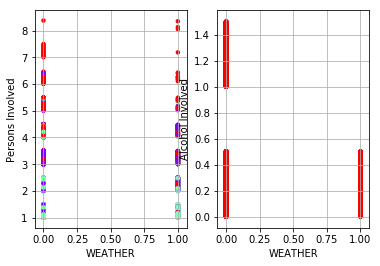

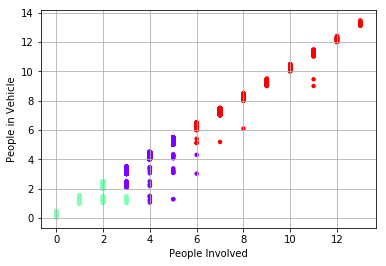

In [100]:
n_person=3
n_permvit=4

X_2 = df_acc_dum[['STATE', 'VE_TOTAL', 'DAY_WEEK_1', 'DAY_WEEK_2', 'DAY_WEEK_3', 'DAY_WEEK_4' , 
                  'DAY_WEEK_5', 'DAY_WEEK_6', 'DAY_WEEK_7', 'HR_RANGE_1', 'HR_RANGE_2', 'HR_RANGE_3', 'HR_RANGE_4', 
                  'HR_RANGE_5','HR_RANGE_6', 'MAN_COLL_0','MAN_COLL_1', 'MAN_COLL_2','MAN_COLL_6', 'MAN_COLL_7', 
                  'MAN_COLL_8', 'MAN_COLL_9', 'MAN_COLL_11', 'HARM_RED_1','HARM_RED_2', 'HARM_RED_3', 
                  'HARM_RED_4', 'HARM_RED_5', 'HARM_RED_6', 'LGT_COND_1', 'LGT_COND_2', 'LGT_COND_3', 'LGT_COND_4', 'LGT_COND_5',  'WEATHER_1', 'WEATHER_2',
                 'WEATHER_3', 'WEATHER_4', 'WEATHER_5', 'WEATHER_6', 'WEATHER_10', 'WEATHER_11', 'WEATHER_12', 'DRUNK_DR']]



cls_person = KMeans(n_clusters=n_person, init='k-means++',random_state=1)
cls_person.fit(X_1)
newfeature_person = cls_person.labels_ # the labels from kmeans clustering

# append on the second clustering
cls_permvit = KMeans(n_clusters=n_permvit, init='k-means++',random_state=1)
cls_permvit.fit(X_2)
newfeature_permvit = cls_permvit.labels_ # the labels from kmeans clustering

plt.figure()
plt.subplot(1,2,1)
X_2=X_2.values
plt.scatter(X_2[:, 7], X_2[:, 1]+np.random.random(X_2[:, 1].shape)/2, c=newfeature_person, cmap=plt.cm.rainbow, s=20, linewidths=0)
plt.xlabel('WEATHER'), plt.ylabel('Persons Involved')
plt.grid()

plt.subplot(1,2,2)
plt.scatter(X_2[:, 7], X_2[:, 8]+np.random.random(X_2[:, 1].shape)/2, c=newfeature_permvit, cmap=plt.cm.rainbow, s=20, linewidths=0)
plt.xlabel('WEATHER'), plt.ylabel('Alcohol Involved')
plt.grid()

X_1=X_1.values
plt.figure()
plt.scatter(X_1[:, 0], X_1[:, 1]+np.random.random(X_1[:, 0].shape)/2, c=newfeature_person, cmap=plt.cm.rainbow, s=20, linewidths=0)
plt.xlabel('People Involved'), plt.ylabel('People in Vehicle')
plt.grid()

Choosing to use df_acc_dum was a really good choice as the clusters are more easily distinguishable and defined than when the data has no one-hot encoded attributes. 

Therefore, at this point we decided to proceed considering only those dataframes we have created that contain one-hot encoded attributes:

- df_acc_dum, which includes the attribute STATE in its original form
- df_r_dumm, which contains the newly created attribute REGION (derived from STATE) that was one-hot encoded also.

After getting the accuracy and deviation results from using df_r_dumm we will decide if doing Agglomerative and DBSCAN should be performed on both dataframes or just the one that provides better results: higher accuracy and lower deviation. 


#### KMeans with dr_r_dumm

In [101]:
X_1 = df_r_dumm[['PERSONS', 'PERMVIT']]
X_2 = df_r_dumm[['VE_TOTAL', 'DAY_WEEK_1', 'DAY_WEEK_2', 'DAY_WEEK_3', 'DAY_WEEK_4' , 
                  'DAY_WEEK_5', 'DAY_WEEK_6', 'DAY_WEEK_7', 'HR_RANGE_1', 'HR_RANGE_2', 'HR_RANGE_3', 'HR_RANGE_4', 
                  'HR_RANGE_5','HR_RANGE_6', 'MAN_COLL_0','MAN_COLL_1', 'MAN_COLL_2','MAN_COLL_6', 'MAN_COLL_7', 
                  'MAN_COLL_8', 'MAN_COLL_9', 'MAN_COLL_11', 'HARM_RED_1','HARM_RED_2', 'HARM_RED_3', 
                  'HARM_RED_4', 'HARM_RED_5', 'HARM_RED_6', 'LGT_COND_1', 'LGT_COND_2', 'LGT_COND_3', 
                 'LGT_COND_4', 'LGT_COND_5',  'WEATHER_1', 'WEATHER_2', 'WEATHER_3', 'WEATHER_4', 'WEATHER_5', 
                 'WEATHER_6', 'WEATHER_10', 'WEATHER_11', 'WEATHER_12', 'REGION_1', 'REGION_2', 'REGION_3', 'REGION_4', 'DRUNK_DR']]


params = []
for n_person in range(3,6):
    for n_permvit in range(3,6):
        # get the first clustering
        cls_person = KMeans(n_clusters=n_person, init='k-means++',random_state=1)
        cls_person.fit(X_1)
        newfeature_person = cls_person.labels_ # the labels from kmeans clustering

        # append on the second clustering
        cls_permvit = KMeans(n_clusters=n_permvit, init='k-means++',random_state=1)
        cls_permvit.fit(X_2)
        newfeature_permvit = cls_permvit.labels_ # the labels from kmeans clustering

        y = df_r_dumm['FATALS']
        X = df_r_dumm[['VE_TOTAL', 'DAY_WEEK_1', 'DAY_WEEK_2', 'DAY_WEEK_3', 'DAY_WEEK_4' , 
                  'DAY_WEEK_5', 'DAY_WEEK_6', 'DAY_WEEK_7', 'HR_RANGE_1', 'HR_RANGE_2', 'HR_RANGE_3', 'HR_RANGE_4', 
                  'HR_RANGE_5','HR_RANGE_6', 'MAN_COLL_0','MAN_COLL_1', 'MAN_COLL_2','MAN_COLL_6', 'MAN_COLL_7', 
                  'MAN_COLL_8', 'MAN_COLL_9', 'MAN_COLL_11', 'HARM_RED_1','HARM_RED_2', 'HARM_RED_3', 
                  'HARM_RED_4', 'HARM_RED_5', 'HARM_RED_6', 'LGT_COND_1', 'LGT_COND_2', 'LGT_COND_3', 
                 'LGT_COND_4', 'LGT_COND_5',  'WEATHER_1', 'WEATHER_2', 'WEATHER_3', 'WEATHER_4', 'WEATHER_5', 
                 'WEATHER_6', 'WEATHER_10', 'WEATHER_11', 'WEATHER_12', 'REGION_1', 'REGION_2', 'REGION_3', 'REGION_4', 'DRUNK_DR']]
        X = np.column_stack((X,pd.get_dummies(newfeature_person),pd.get_dummies(newfeature_permvit)))

        acc = cross_val_score(clf,X,y=y,cv=cv)
        params.append((n_person,n_permvit,acc.mean()*100,acc.std()*100)) # save state

        print ("Clusters",n_person,n_permvit,"Average accuracy = ", acc.mean()*100, "+-", acc.std()*100)
        

Clusters 3 3 Average accuracy =  91.2882171091 +- 0.195415322064
Clusters 3 4 Average accuracy =  91.2951567377 +- 0.167575598888
Clusters 4 3 Average accuracy =  91.3368113572 +- 0.235188473275
Clusters 4 4 Average accuracy =  91.3194598853 +- 0.276614566115


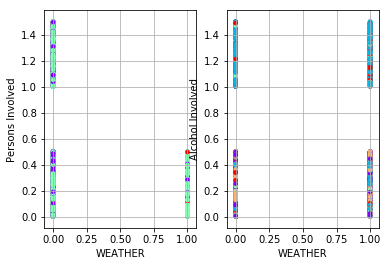

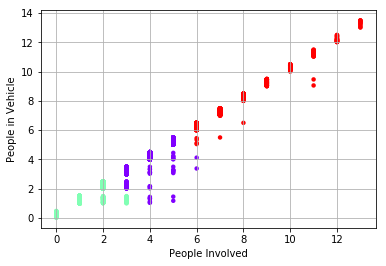

In [102]:
n_person=3
n_permvit=5

X_2 = df_r_dumm[['VE_TOTAL', 'DAY_WEEK_1', 'DAY_WEEK_2', 'DAY_WEEK_3', 'DAY_WEEK_4' , 
                  'DAY_WEEK_5', 'DAY_WEEK_6', 'DAY_WEEK_7', 'HR_RANGE_1', 'HR_RANGE_2', 'HR_RANGE_3', 'HR_RANGE_4', 
                  'HR_RANGE_5','HR_RANGE_6', 'MAN_COLL_0','MAN_COLL_1', 'MAN_COLL_2','MAN_COLL_6', 'MAN_COLL_7', 
                  'MAN_COLL_8', 'MAN_COLL_9', 'MAN_COLL_11', 'HARM_RED_1','HARM_RED_2', 'HARM_RED_3', 
                  'HARM_RED_4', 'HARM_RED_5', 'HARM_RED_6', 'LGT_COND_1', 'LGT_COND_2', 'LGT_COND_3', 
                 'LGT_COND_4', 'LGT_COND_5',  'WEATHER_1', 'WEATHER_2', 'WEATHER_3', 'WEATHER_4', 'WEATHER_5', 
                 'WEATHER_6', 'WEATHER_10', 'WEATHER_11', 'WEATHER_12', 'REGION_1', 'REGION_2', 'REGION_3', 'REGION_4', 'DRUNK_DR']]



cls_person = KMeans(n_clusters=n_person, init='k-means++',random_state=1)
cls_person.fit(X_1)
newfeature_person = cls_person.labels_ # the labels from kmeans clustering

# append on the second clustering
cls_permvit = KMeans(n_clusters=n_permvit, init='k-means++',random_state=1)
cls_permvit.fit(X_2)
newfeature_permvit = cls_permvit.labels_ # the labels from kmeans clustering

plt.figure()
plt.subplot(1,2,1)
X_2=X_2.values
plt.scatter(X_2[:, 7], X_2[:, 1]+np.random.random(X_2[:, 1].shape)/2, c=newfeature_person, cmap=plt.cm.rainbow, s=20, linewidths=0)
plt.xlabel('WEATHER'), plt.ylabel('Persons Involved')
plt.grid()

plt.subplot(1,2,2)
plt.scatter(X_2[:, 7], X_2[:, 8]+np.random.random(X_2[:, 1].shape)/2, c=newfeature_permvit, cmap=plt.cm.rainbow, s=20, linewidths=0)
plt.xlabel('WEATHER'), plt.ylabel('Alcohol Involved')
plt.grid()

X_1=X_1.values
plt.figure()
plt.scatter(X_1[:, 0], X_1[:, 1]+np.random.random(X_1[:, 0].shape)/2, c=newfeature_person, cmap=plt.cm.rainbow, s=20, linewidths=0)
plt.xlabel('People Involved'), plt.ylabel('People in Vehicle')
plt.grid()

In [103]:
%%time 

from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import numpy as np

from sklearn.cluster import AgglomerativeClustering

X_1 = df_r_dumm[['PERSONS', 'PERMVIT']]

params= []
for link in ['ward', 'complete', 'average']:
    for n_person in range(3,6):
        

            # append on the clustering
            cls_person = AgglomerativeClustering(n_clusters=n_person, linkage=link)
            cls_person.fit(X_2)
            newfeature_person = cls_person.labels_ # the labels from kmeans clustering
        
        

            y = df_r_dumm['FATALS']
            X = df_r_dumm[['VE_TOTAL', 'DAY_WEEK_1', 'DAY_WEEK_2', 'DAY_WEEK_3', 'DAY_WEEK_4' , 
                  'DAY_WEEK_5', 'DAY_WEEK_6', 'DAY_WEEK_7', 'HR_RANGE_1', 'HR_RANGE_2', 'HR_RANGE_3', 'HR_RANGE_4', 
                  'HR_RANGE_5','HR_RANGE_6', 'MAN_COLL_0','MAN_COLL_1', 'MAN_COLL_2','MAN_COLL_6', 'MAN_COLL_7', 
                  'MAN_COLL_8', 'MAN_COLL_9', 'MAN_COLL_11', 'HARM_RED_1','HARM_RED_2', 'HARM_RED_3', 
                  'HARM_RED_4', 'HARM_RED_5', 'HARM_RED_6', 'LGT_COND_1', 'LGT_COND_2', 'LGT_COND_3', 
                 'LGT_COND_4', 'LGT_COND_5',  'WEATHER_1', 'WEATHER_2', 'WEATHER_3', 'WEATHER_4', 'WEATHER_5', 
                 'WEATHER_6', 'WEATHER_10', 'WEATHER_11', 'WEATHER_12', 'REGION_1', 'REGION_2', 'REGION_3', 'REGION_4', 'DRUNK_DR']]
            X = np.column_stack((X,pd.get_dummies(newfeature_person)))

            acc = cross_val_score(clf,X,y=y,cv=cv)
            params.append((n_person,acc.mean()*100,acc.std()*100)) # save state

            print ("C=",n_person, link,"Average accuracy = ", acc.mean()*100, "+-", acc.std()*100)

C= 3 ward Average accuracy =  91.3542049489 +- 0.363581888056
C= 4 ward Average accuracy =  91.3229814461 +- 0.383410560013
C= 3 complete Average accuracy =  91.3056287715 +- 0.422009244719
C= 4 complete Average accuracy =  91.3437931056 +- 0.396725291176
C= 3 average Average accuracy =  91.3403160675 +- 0.373461195503
C= 4 average Average accuracy =  91.3541953222 +- 0.374272382325
Wall time: 10min 51s


Deployment